# What drives the price of a car?

![](/images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

#### Objective: Identify key factors that contribute to the Car Price

The dataset is expected to have gas, hybrid, and electric cars. There are various factors that drive the price of a car. Gasoline cars may have different attributes compared to electric cars. Customer preference also matters. Demand vs. supply also matters.

We have to create an hypothesis about customer preference and validate it against the data.

#### Success Criteria:
For a given set of attributes that exists in the input dataset, our selected model should be able to determine the price of the car with an accuracy of 80%.

Outside the scope of this assignment: The current dataset for this assignment can be divided into two sets: one set that has complete data (all rows have values), another set that has missing data (at least one row has missing value). If we can determine a model that can predict and populate the missing value while maintaining the accuracy of new data, it would be a great model.

#### Situation Analysis:
We have only 1 week to complete the activity. This is the first time we are looking at the data. There are no supporting documentation that provides information about the data except the assignment jupyter notebook.
- Due to the limited time (1 week to complete the activity), we may not be able to perform a detailed exploratory data analysis. 
- We may have to take shortcuts to fix the data quality issues. In some cases, we may have to drop data as it may be too time consuming to fix the quality of the data
- During modeling activities, we may have to fast track some of the work by forcing values to hyperparameters
- Since there is no way to get feedback (from end customers, peer review, or TA), we may end up performing incorrect analysis and spending too much time on wrong section of the dataset
- Some of the attributes may result in multiple values. Performing OneHotEncoder may result in increasing the total number of attributes. Thus expanding our analysis and epocs for model selection & validation
- In the process of cleaning the data, we may mistakenly delete / drop valuable data that be critical to the analysis in the future steps
- We may also cleanse the data too much resulting in synthesized data which does not reflect the true dataset  

#### Data Mining Goals and Next Steps:

#### Load and Clean the data:
- Step 1: Load the data into a dataframe and analyze the data for any anomolies
- Step 2: Anomolies can be any one of these:
> - 2a: missing data
> - 2b: outliers (data should be logical; if data does not make sense, exclude them)
> - 2c: If 'year' data is missing, exclude them 
> - 2d: If 'price' data is missing, exclude them. We need to determine what drives the price, without this data, it will be difficult to determine the drivers for 'price'
- Step 3: Create a clean version of the dataset for analysis
- Step 4: Perform Data Quality checks: Completness, Uniqueness, Consistency, and Auditability
- Step 4: Analyze the data for completeness. If data is not required, exclude them
- Step 5: Analyze the data for uniqueness. If the data does not have variety, then we have skewed data
- Step 6: Check for Consistency. Example, electric, hybrid, and gasoline cars have specific attributes. Does the data reflect this
- Step 6: Fill null values; for numeric columns, use mean (average) and for non-numeric columns, use mode (most frequent)

#### Exploratory Data Analysis
- Understand each of the data elements and its patterns
- Identify any correlation between data elements
- Plot the data to visualize patterns

#### Data Prepartion
- Transform the data for modeling
- Split the data into Training and Validation sets

#### Model selection, validation, and tuning
- Apply various models to the dataset
- Validate the model against the hypothesis
- Perform hyperparameter tuning  

#### Tools and Techniques + Project Timeline:

#### To perform Exploratory Data Analysis, we will use the following tools and techniques:
- python, pandas, numpy, matplotlib, seaborn, pyplot

#### To perform Data Quality checks, Data Cleaning, we will use the following tools and techniques:
- python, pandas, numpy, sklearn, onehotencoder, matplotlib, pyplot

#### To perform Modeling activities, we will use some or all of the following tools and techniques:
- python, pandas, numpy, sklearn, statmodels, pmdarima, ACF, adfuller, SARIMAX,
- LinearRegression, MAE, MSE, RMSE, K-Means, GridSearchCV, K-Fold, PCA

Project Timeline:
- Due to office workload, I cannot start work on this project until Friday 6/21
- Start the Data Analysis work on Friday 6/21
- Focus on the Business Understanding on Saturday AM 6/22
- Focus on EDA and Data Cleaning activities on Saturday PM 6/22 and Sunday AM 6/22
- Focus on Visualizing the data on Sunday 6/22 PM
- Focus on Data Preparation for Modeling on Sunday 6/22 PM
- Focus on Modeling on Monday 6/23 PM (after office working hours)
- Finalize the materials on Tuesday 6/23 PM (after office working hours)
- Publish the final documents by Tuesday 6/23 PM

Updated Project Timeline:
- Due to office work commitment (production go live weekend of 6/21, some of the work got slipped)
- Request for extension till 7/3 (push hard to get this done before 7/4 )
- Pause work until 6/28 to focus on office post-production issues
- Resume work on 6/28 to finalize Data Preparation, Modeling, and Final summary
- Publish the final document by Sunday 6/30


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [1]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa import arima_process
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.api import qqplot

from statsmodels.datasets import nile
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsaplots

from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OrdinalEncoder, OneHotEncoder 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.model_selection import train_test_split

from pmdarima import auto_arima

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the data into 'vehicles' dataframe
vehicles = pd.read_csv('data/vehicles.csv')
vehicles

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


In [3]:
# Let's explore the details about the vehicles dataframe
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [4]:
# Looks like there are a few null values. Let's look at the count of null values by each column
check_veh = pd.DataFrame(vehicles.isna().sum(axis = 0),columns=['Nulls'])
check_veh['Percentage'] = round(check_veh/426880,2)
check_veh

,Nulls,Percentage
id,0,0.00
region,0,0.00
price,0,0.00
year,1205,0.00
manufacturer,17646,0.04
model,5277,0.01
condition,174104,0.41
cylinders,177678,0.42
fuel,3013,0.01
odometer,4400,0.01


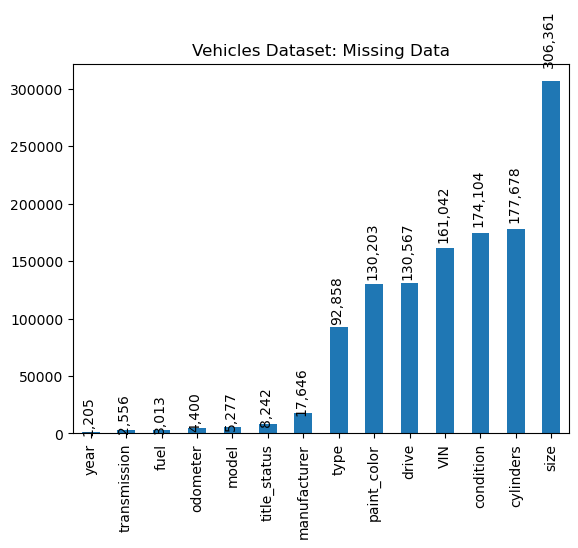

In [5]:
# Let's plot the missing data

missing = vehicles.isna().sum(axis = 0)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
ax = missing.plot.bar(title='Vehicles Dataset: Missing Data')
for p in ax.patches:
    ax.annotate("{:,}".format(int(p.get_height())), (p.get_x() * 1, p.get_height() * 1.05),rotation=90)
plt.show()

In [6]:
# Looks like we have all rows with some price value for the car. Let's see if there are any abnormality in the price values

print(f'price - min: {vehicles.price.min()}, price - max : {vehicles.price.max():,}')

price - min: 0, price - max : 3,736,928,711


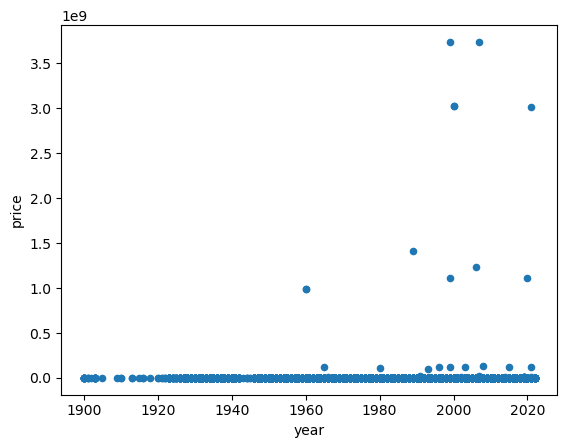

In [7]:
# Looks like there are outliers in the price data. Let's plot price data on the chart

vehicles.plot(kind='scatter',x='year', y='price', style='o')
plt.show()

In [8]:
# Due to the anomoly in the data, we are unable to see the plot correctly. Let's find out how many records have 
# price = 0
# price > 2 Million 

print (f'Total number of vehicles with price = 0         are : {vehicles.price.eq(0).sum(axis=0):,}')
print (f'Total number of vehicles with price < 100       are : {vehicles.price.lt(100).sum(axis=0):,}')
print (f'Total number of vehicles with price > 2 million are : {vehicles.price.gt(2000000).sum(axis=0):,}')
print (f'Total number of vehicles with price > 500,000   are : {vehicles.price.gt(500000).sum(axis=0):,}')

Total number of vehicles with price = 0         are : 32,895
Total number of vehicles with price < 100       are : 36,222
Total number of vehicles with price > 2 million are : 33
Total number of vehicles with price > 500,000   are : 68


In [9]:
# Based on above data, it looks like we should remove price = 0 as we cannot predict the value of the used car (cannot be zero) 
# and we want to eliminate any used car above 500,000 to help us have better test and validation dataset
# Although the data looks incorrect with price of car with 1, 2, 3... 100, ... 1000, we want to keep it. 
# We don't know if the value is accurate or input

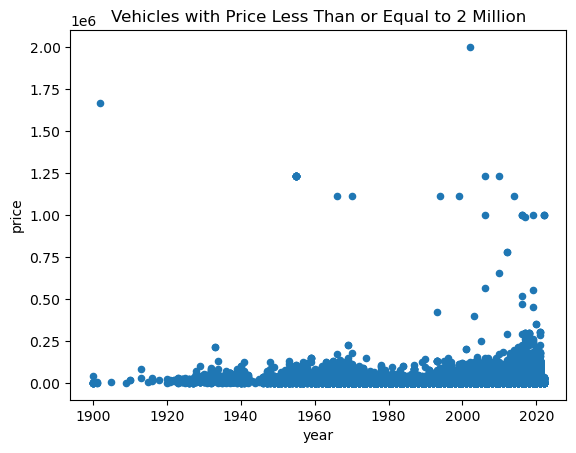

In [10]:
# Let's plot the data excluding the outliers where price > 2M and price not equal to zero

vehicles[vehicles.price.ne(0) & vehicles.price.le(2000000)].plot(kind='scatter',x='year', y='price', style='o')
plt.title('Vehicles with Price Less Than or Equal to 2 Million')
plt.show()

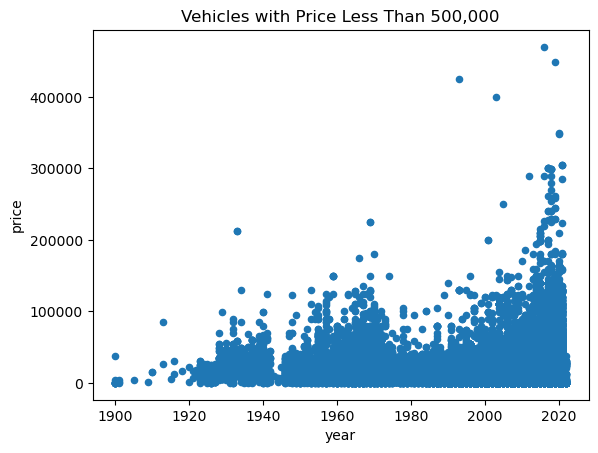

In [11]:
# We still see lots of anomolies with price greater than 500,000 and price = 0. 
# So let's exclude them as well and see how the data shows for price

vehicles[vehicles.price.ne(0) & vehicles.price.lt(500000)].plot(kind='scatter',x='year', y='price', style='o')
plt.title('Vehicles with Price Less Than 500,000')
plt.show()

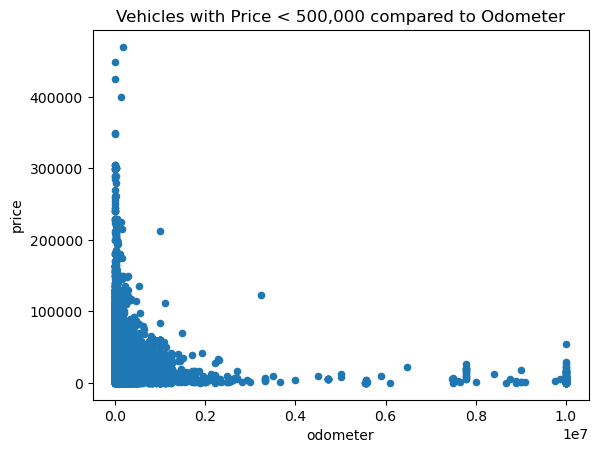

In [12]:
# Let's review the data for price range between 1 and 500,000 along with odometer 

vehicles[vehicles.price.ne(0) & vehicles.price.lt(500000)].plot(kind='scatter',x='odometer', y='price', style='o')
plt.title('Vehicles with Price < 500,000 compared to Odometer')
plt.show()

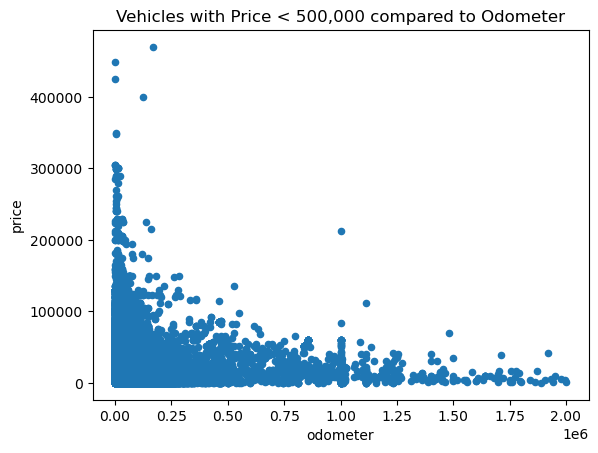

In [13]:
# Looks like the odometer data needs to be trimmed down. Let's use odometer reading between 0 and 2,000,000

vehicles[vehicles.price.ne(0) & vehicles.price.lt(500000) & vehicles.odometer.lt(2000000)].plot(kind='scatter',x='odometer', y='price', style='o')
plt.title('Vehicles with Price < 500,000 compared to Odometer')
plt.show()

**Observation :** Based on the above plot, it looks like most of the data shows higher price when the odometer value is very low

In [14]:
# Let's look at the values in the title_status column

vehicles.title_status.unique()

array([nan, 'clean', 'rebuilt', 'lien', 'salvage', 'missing',
       'parts only'], dtype=object)

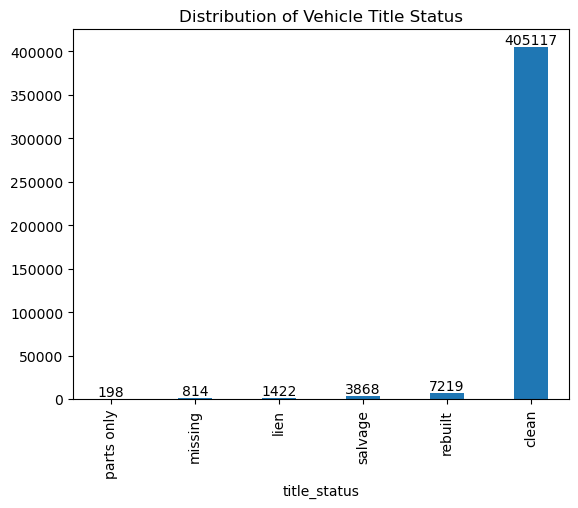

In [15]:
# The title has Nulls, Clean, Rebuilt, Lien, Salvage, Missing, Parts Only
# Let's plot this to see how the data is distributed

veh_titles  = vehicles.groupby('title_status')['title_status'].count()

veh_titles.sort_values(inplace=True)
ax = veh_titles.plot(kind='bar',title='Distribution of Vehicle Title Status', align='center', width=0.4)
ax.bar_label(ax.containers[0])
plt.show()

In [16]:
# Let's look at the values in the condition column

vehicles.condition.unique()

array([nan, 'good', 'excellent', 'fair', 'like new', 'new', 'salvage'],
      dtype=object)

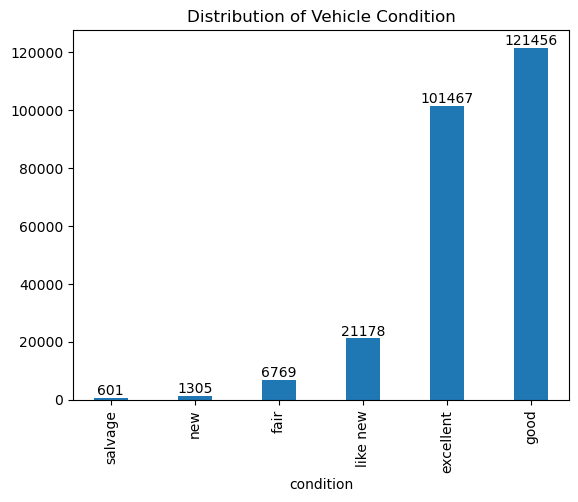

In [17]:
# The condition has Nulls, Good, Excellent, Fair, Like New, New, Salvage
# Let's plot this to see how the data is distributed

veh_cond  = vehicles.groupby('condition')['condition'].count()

veh_cond.sort_values(inplace=True)
ax = veh_cond.plot(kind='bar',title='Distribution of Vehicle Condition', align='center', width=0.4)
ax.bar_label(ax.containers[0])
plt.show()

**Observation:** There are more cars that are either in good or excellent condition. Comparitively fewer cars that are salvage, new, or fair.

In [18]:
# Let's look at the values in the cylinders column

vehicles.cylinders.unique()

array([nan, '8 cylinders', '6 cylinders', '4 cylinders', '5 cylinders',
       'other', '3 cylinders', '10 cylinders', '12 cylinders'],
      dtype=object)

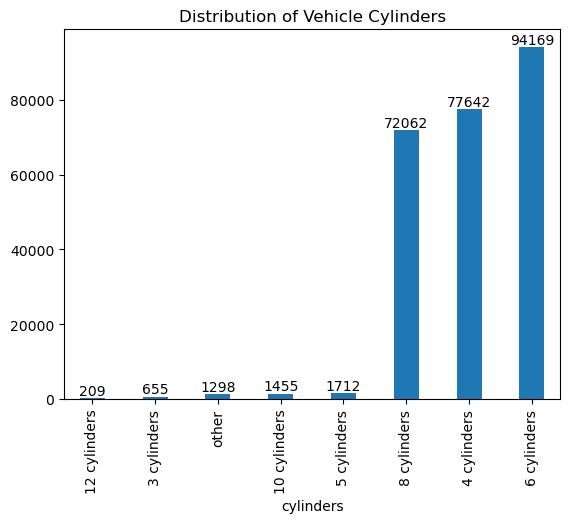

In [19]:
# The cylinders are Nulls, 3,4,5,6,8,10, and 12 Cylinders, and others
# Let's plot this to see how the data is distributed

veh_cylnd  = vehicles.groupby('cylinders')['cylinders'].count()

veh_cylnd.sort_values(inplace=True)
ax = veh_cylnd.plot(kind='bar',title='Distribution of Vehicle Cylinders', align='center', width=0.4)
ax.bar_label(ax.containers[0])
plt.show()

**Observation:** There are more cars with 4, 6, or 8 cylinders compared to others (3, 5, 10, 12 or other cylinder types)

In [20]:
# Let's look at the values in the fuel type column

vehicles.fuel.unique()

array([nan, 'gas', 'other', 'diesel', 'hybrid', 'electric'], dtype=object)

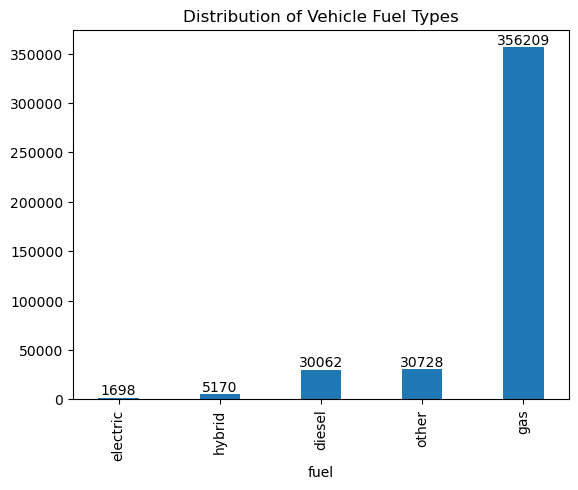

In [21]:
# The fuel types are Nulls, gas, diesel, hybrid, electric, and others
# Let's plot this to see how the data is distributed

veh_fuel  = vehicles.groupby('fuel')['fuel'].count()

veh_fuel.sort_values(inplace=True)
ax = veh_fuel.plot(kind='bar',title='Distribution of Vehicle Fuel Types', align='center', width=0.4)
ax.bar_label(ax.containers[0])
plt.show()

**Observation:** There are more gasoline cars compared to others. There are fewer electric and hybrid cars in the dataset

In [22]:
# Let's look at the values in the transmission type column

vehicles.transmission.unique()

array([nan, 'other', 'automatic', 'manual'], dtype=object)

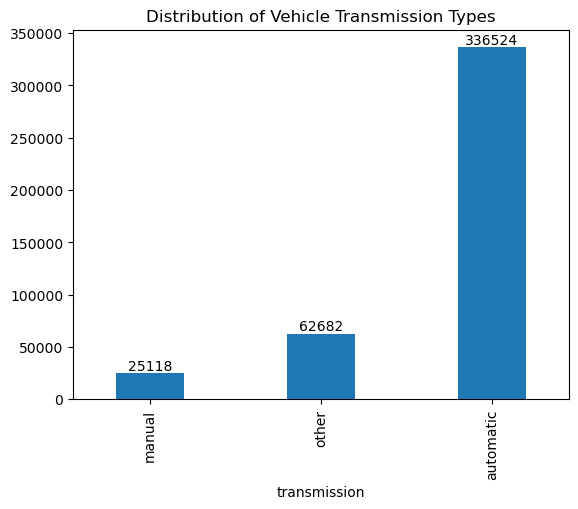

In [23]:
# The transmission types are Nulls, Automatic, Manual, and others
# Let's plot this to see how the data is distributed

veh_trans  = vehicles.groupby('transmission')['transmission'].count()

veh_trans.sort_values(inplace=True)
ax = veh_trans.plot(kind='bar',title='Distribution of Vehicle Transmission Types', align='center', width=0.4)
ax.bar_label(ax.containers[0])
plt.show()

**Observation:** There are more automatic transmission cars compared to others. There are fewer manual and other transmission type cars in the dataset

In [24]:
# Let's look at the values in the drive column

vehicles.drive.unique()

array([nan, 'rwd', '4wd', 'fwd'], dtype=object)

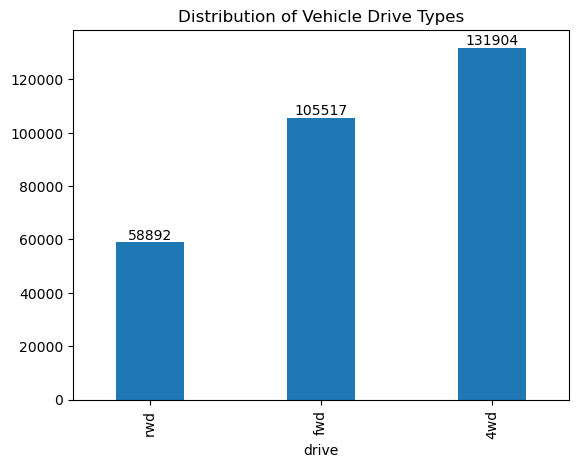

In [25]:
# The drive types are Nulls, 4 wheel drive, forward wheel drive, and rear wheel drive
# Let's plot this to see how the data is distributed

veh_drive  = vehicles.groupby('drive')['drive'].count()

veh_drive.sort_values(inplace=True)
ax = veh_drive.plot(kind='bar',title='Distribution of Vehicle Drive Types', align='center', width=0.4)
ax.bar_label(ax.containers[0])
plt.show()

**Observation:** There are more 4 wheel drive cars compared to others. However, the dataset is very well balanced for drive types

In [26]:
# Let's find out how many rows have Clean title but the price is zero
# This shows that the data is incorrect. Let's remove these records as well
vehicles[(vehicles.price == 0) & (vehicles.title_status == 'clean')].shape

(32250, 18)

In [27]:
# Let's look at the title status for all records with price = 0
vehicles[(vehicles.price == 0)].groupby('title_status')['title_status'].count()

title_status
clean         32250
lien              1
missing          17
parts only        9
rebuilt          79
salvage          31
Name: title_status, dtype: int64

In [28]:
# Let's find out how many records will get excluded if we remove the following:
# Records with year as null
# Records with price Less Than or Equal to Zero
# Records with price Greater Than or Equal to 500,000
# Original record count was 426,880
vehicles[vehicles['year'].notna() & vehicles['price'].gt(0) & vehicles['price'].lt(500000)].shape

(392744, 18)

In [29]:
# Based on the results, it looks like we will remove 426,880 - 392,744 = 34,136 records

In [30]:
# Without an accurate price (32,895 records with price = 0) and 
# with anomolies in the price values (68 records with > 500,000),
# it would be difficult to consider the mean price for all the vehicles
# So we will exclude these rows
# Also, we need a value in column year. so we will remove any null values for year
# This should result in 392,744 records

clean_vehicles = vehicles[vehicles['year'].notna() & vehicles['price'].gt(0) & vehicles['price'].lt(500000)]
clean_vehicles.shape

(392744, 18)

In [31]:
# Let's look at the dataset one more time
clean_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392744 entries, 27 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            392744 non-null  int64  
 1   region        392744 non-null  object 
 2   price         392744 non-null  int64  
 3   year          392744 non-null  float64
 4   manufacturer  377739 non-null  object 
 5   model         388128 non-null  object 
 6   condition     242568 non-null  object 
 7   cylinders     232443 non-null  object 
 8   fuel          390409 non-null  object 
 9   odometer      390517 non-null  float64
 10  title_status  385314 non-null  object 
 11  transmission  390983 non-null  object 
 12  VIN           240705 non-null  object 
 13  drive         272814 non-null  object 
 14  size          111032 non-null  object 
 15  type          307030 non-null  object 
 16  paint_color   275778 non-null  object 
 17  state         392744 non-null  object 
dtypes: float

In [32]:
# Let's look at the first 10 rows of the clean dataset
clean_vehicles.head(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
27,7316814884,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,al
28,7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,al
29,7316814989,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,al
30,7316743432,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,5TFRM5F17HX120972,NaN,NaN,pickup,red,al
31,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,NaN,rwd,full-size,truck,black,al
32,7316343444,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,1GT220CG8CZ231238,4wd,NaN,pickup,black,al
33,7316304717,auburn,34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,clean,other,1GCVKREH6GZ228691,4wd,NaN,pickup,silver,al
34,7316285779,auburn,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,clean,automatic,NaN,4wd,NaN,truck,grey,al
35,7316257769,auburn,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,1GCHTCE37G1186784,4wd,NaN,pickup,red,al
36,7316133914,auburn,38590,2011.0,chevrolet,corvette grand sport,good,8 cylinders,gas,30237.0,clean,other,1G1YR3DW3B5102190,rwd,NaN,other,red,al


In [33]:
# Since we have to determine what drives the price of a car, let's find out the minimum and maximum value of the car price
clean_vehicles.price.min(), clean_vehicles.price.max() 

(1, 470000)

In [34]:
# We still see fake data in the price value. However, to ensure we keep original data, I am not going to distrub these records
# Let's look at the price of used cars where price is between 1 and 10
for i in range(1,11):
    print(i, clean_vehicles[clean_vehicles['price'].eq(i)].price.count())

1 1951
2 13
3 9
4 4
5 16
6 12
7 8
8 7
9 14
10 26


In [35]:
# Now that we have clean vehicle data that we are comfortable to use, let's find out how of the other columns have missing data
clean_vehicles.isna().sum(axis=0)

id                   0
region               0
price                0
year                 0
manufacturer     15005
model             4616
condition       150176
cylinders       160301
fuel              2335
odometer          2227
title_status      7430
transmission      1761
VIN             152039
drive           119930
size            281712
type             85714
paint_color     116966
state                0
dtype: int64

In [36]:
# Let's also find out the data types of each of the columns to see if we can apply mean value on numeric data
clean_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392744 entries, 27 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            392744 non-null  int64  
 1   region        392744 non-null  object 
 2   price         392744 non-null  int64  
 3   year          392744 non-null  float64
 4   manufacturer  377739 non-null  object 
 5   model         388128 non-null  object 
 6   condition     242568 non-null  object 
 7   cylinders     232443 non-null  object 
 8   fuel          390409 non-null  object 
 9   odometer      390517 non-null  float64
 10  title_status  385314 non-null  object 
 11  transmission  390983 non-null  object 
 12  VIN           240705 non-null  object 
 13  drive         272814 non-null  object 
 14  size          111032 non-null  object 
 15  type          307030 non-null  object 
 16  paint_color   275778 non-null  object 
 17  state         392744 non-null  object 
dtypes: float

In [37]:
# Since there are no missing values for id, region, price, and year, we can use the data as is. 
# The only other numeric data is odometer. We find that there are some missing records
# Let's populate the missing data with mean value
# Before we do that, let's see if there are any rows in odometer with value = zero

clean_vehicles.odometer.min(), clean_vehicles.odometer.max()

(0.0, 10000000.0)

In [38]:
# We see some more anomolies. We see used cars with odometer = 0. This is incorrect. We also see odometer = 10 million. 
# Most cars have a maximum odometer around 200,000. 
# However, to ensure we keep the data intact, we will remove any odometer that is more than 1 million

clean_vehicles[clean_vehicles.odometer.eq(0)].odometer.count(), clean_vehicles[clean_vehicles.odometer.gt(1000000)].odometer.count()

(1102, 462)

In [39]:
clean_vehicles[clean_vehicles.VIN=='JTJYARBZ5G2041512']

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
116,7306676175,auburn,26990,2016.0,lexus,nx 200t sport utility 4d,good,NaN,gas,31363.0,clean,other,JTJYARBZ5G2041512,fwd,NaN,hatchback,white,al


In [40]:
# Let's remove the records with odometer equal to 0 and odometer greater than 1,000,000 (1 million)

clean_vehicles.drop(clean_vehicles[clean_vehicles.odometer.eq(0)].index, inplace=True)
clean_vehicles.drop(clean_vehicles[clean_vehicles.odometer.gt(1000000)].index, inplace=True)

#clean_vehicles = clean_vehicles[clean_vehicles.odometer.ne(0) & clean_vehicles.odometer.lt(1000000)]

# Let's now look at the clean_vehicles dataset information
clean_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391180 entries, 27 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            391180 non-null  int64  
 1   region        391180 non-null  object 
 2   price         391180 non-null  int64  
 3   year          391180 non-null  float64
 4   manufacturer  376480 non-null  object 
 5   model         386619 non-null  object 
 6   condition     241575 non-null  object 
 7   cylinders     231492 non-null  object 
 8   fuel          388880 non-null  object 
 9   odometer      388953 non-null  float64
 10  title_status  384001 non-null  object 
 11  transmission  389419 non-null  object 
 12  VIN           239758 non-null  object 
 13  drive         271922 non-null  object 
 14  size          110680 non-null  object 
 15  type          305982 non-null  object 
 16  paint_color   274894 non-null  object 
 17  state         391180 non-null  object 
dtypes: float

In [41]:
# There are still some missing values. Let's explore odometer and see how many of them are missing values

clean_vehicles.odometer.isna().sum(axis=0)

2227

In [42]:
# Similar to price, let's find out if odometer is also overwritten with low values. 
# If so, then we have fake data in the odometer column as well. 
# To ensure we keep original data, I am not going to distrub these records
# Let's look at the odometer of used cars where odometer is between 1 and 10
for i in range(1,11):
    print(i, clean_vehicles[clean_vehicles['odometer'].eq(i)].odometer.count())

1 1890
2 119
3 49
4 135
5 165
6 31
7 56
8 35
9 25
10 331


In [43]:
# Let's find out the total number of records with odometer less than 100
x = clean_vehicles[clean_vehicles['odometer'].le(100)].odometer.count()
print ('Total number of records with odometer less than or equal to 100 :', x)

Total number of records with odometer less than or equal to 100 : 4083


In [44]:
# This tells us that the data is not accurate. However, we will go ahead and use the mean value to populate missing odometer values

In [45]:
# Let's look at the first 10 rows of the clean dataset that has missing odometer values

clean_vehicles[clean_vehicles.odometer.isna()].head(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
541,7313589313,birmingham,18950,2009.0,jeep,wrangler,excellent,NaN,gas,NaN,clean,automatic,NaN,4wd,NaN,NaN,NaN,al
772,7311452208,birmingham,14950,2007.0,jeep,wrangler,excellent,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,silver,al
1030,7309386327,birmingham,19950,2008.0,jeep,wrangler,excellent,NaN,gas,NaN,clean,automatic,NaN,4wd,NaN,NaN,black,al
1244,7306994204,birmingham,17950,2009.0,jeep,wrangler,excellent,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,black,al
1245,7306994088,birmingham,15950,2008.0,jeep,wrangler,excellent,NaN,gas,NaN,clean,automatic,NaN,4wd,NaN,NaN,NaN,al
1246,7306993994,birmingham,16950,2007.0,jeep,wrangler,excellent,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,red,al
1247,7306993889,birmingham,22950,2013.0,jeep,wrangler,excellent,NaN,gas,NaN,clean,automatic,NaN,4wd,NaN,NaN,NaN,al
1248,7306993794,birmingham,32950,2016.0,jeep,wrangler,excellent,NaN,gas,NaN,clean,automatic,NaN,4wd,NaN,NaN,red,al
1249,7306993678,birmingham,28950,2017.0,jeep,wrangler unlimited,excellent,NaN,gas,NaN,clean,automatic,NaN,4wd,NaN,NaN,silver,al
5455,7314992435,anchorage / mat-su,66840,2019.0,ram,1500,NaN,NaN,gas,NaN,clean,automatic,1C6SRFPT7KN512563,4wd,NaN,pickup,NaN,ak


In [46]:
# Let's keep track of the index numbers for the missing odometer values
odo_first_10 = clean_vehicles[clean_vehicles.odometer.isna()].index[:10].tolist()

In [47]:
# Let's look at the data for the first 10 rows that have missing odometer
clean_vehicles.loc[odo_first_10]

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
541,7313589313,birmingham,18950,2009.0,jeep,wrangler,excellent,NaN,gas,NaN,clean,automatic,NaN,4wd,NaN,NaN,NaN,al
772,7311452208,birmingham,14950,2007.0,jeep,wrangler,excellent,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,silver,al
1030,7309386327,birmingham,19950,2008.0,jeep,wrangler,excellent,NaN,gas,NaN,clean,automatic,NaN,4wd,NaN,NaN,black,al
1244,7306994204,birmingham,17950,2009.0,jeep,wrangler,excellent,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,black,al
1245,7306994088,birmingham,15950,2008.0,jeep,wrangler,excellent,NaN,gas,NaN,clean,automatic,NaN,4wd,NaN,NaN,NaN,al
1246,7306993994,birmingham,16950,2007.0,jeep,wrangler,excellent,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,red,al
1247,7306993889,birmingham,22950,2013.0,jeep,wrangler,excellent,NaN,gas,NaN,clean,automatic,NaN,4wd,NaN,NaN,NaN,al
1248,7306993794,birmingham,32950,2016.0,jeep,wrangler,excellent,NaN,gas,NaN,clean,automatic,NaN,4wd,NaN,NaN,red,al
1249,7306993678,birmingham,28950,2017.0,jeep,wrangler unlimited,excellent,NaN,gas,NaN,clean,automatic,NaN,4wd,NaN,NaN,silver,al
5455,7314992435,anchorage / mat-su,66840,2019.0,ram,1500,NaN,NaN,gas,NaN,clean,automatic,1C6SRFPT7KN512563,4wd,NaN,pickup,NaN,ak


In [48]:
# Quick check. Let's find out how many missing odometer values we still have in our clean_vehicles dataset
clean_vehicles.odometer.isna().sum(axis=0)

2227

In [49]:
# There are 2227 rows with missing values. Let's replace the missing values with mean of the odometer values
clean_vehicles.odometer.fillna(round(clean_vehicles.odometer.mean()), inplace=True)
# Let's find out if there are any more missing values for odometer after we updated them with mean values. We should get a result of 0
clean_vehicles.odometer.isna().sum(axis=0)

0

In [50]:
# Let's use the same index numbers and find out what values were changed for odometer
clean_vehicles.loc[odo_first_10]

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
541,7313589313,birmingham,18950,2009.0,jeep,wrangler,excellent,NaN,gas,94239.0,clean,automatic,NaN,4wd,NaN,NaN,NaN,al
772,7311452208,birmingham,14950,2007.0,jeep,wrangler,excellent,NaN,gas,94239.0,clean,automatic,NaN,NaN,NaN,NaN,silver,al
1030,7309386327,birmingham,19950,2008.0,jeep,wrangler,excellent,NaN,gas,94239.0,clean,automatic,NaN,4wd,NaN,NaN,black,al
1244,7306994204,birmingham,17950,2009.0,jeep,wrangler,excellent,NaN,gas,94239.0,clean,automatic,NaN,NaN,NaN,NaN,black,al
1245,7306994088,birmingham,15950,2008.0,jeep,wrangler,excellent,NaN,gas,94239.0,clean,automatic,NaN,4wd,NaN,NaN,NaN,al
1246,7306993994,birmingham,16950,2007.0,jeep,wrangler,excellent,NaN,gas,94239.0,clean,automatic,NaN,NaN,NaN,NaN,red,al
1247,7306993889,birmingham,22950,2013.0,jeep,wrangler,excellent,NaN,gas,94239.0,clean,automatic,NaN,4wd,NaN,NaN,NaN,al
1248,7306993794,birmingham,32950,2016.0,jeep,wrangler,excellent,NaN,gas,94239.0,clean,automatic,NaN,4wd,NaN,NaN,red,al
1249,7306993678,birmingham,28950,2017.0,jeep,wrangler unlimited,excellent,NaN,gas,94239.0,clean,automatic,NaN,4wd,NaN,NaN,silver,al
5455,7314992435,anchorage / mat-su,66840,2019.0,ram,1500,NaN,NaN,gas,94239.0,clean,automatic,1C6SRFPT7KN512563,4wd,NaN,pickup,NaN,ak


In [51]:
# Now let's find out the unique values in each of the columns. If there are less than 10 values, let's identify them
cols = []
for col in clean_vehicles.columns:
    if clean_vehicles[col].nunique() < 10: 
        cols.append(col)
        print (col, clean_vehicles[col].nunique(), clean_vehicles[col].unique(), '\n')

condition 6 ['good' 'excellent' 'fair' nan 'like new' 'new' 'salvage'] 

cylinders 8 ['8 cylinders' '6 cylinders' nan '4 cylinders' '5 cylinders' 'other'
 '3 cylinders' '10 cylinders' '12 cylinders'] 

fuel 5 ['gas' 'other' 'diesel' 'hybrid' nan 'electric'] 

title_status 6 ['clean' 'rebuilt' 'lien' nan 'salvage' 'missing' 'parts only'] 

transmission 3 ['other' 'automatic' 'manual' nan] 

drive 3 [nan 'rwd' '4wd' 'fwd'] 

size 4 [nan 'full-size' 'mid-size' 'compact' 'sub-compact'] 



In [52]:
# Let's find out how many unique values we have for VIN number
clean_vehicles.VIN.nunique(), clean_vehicles.shape[0]

(104712, 391180)

In [53]:
# Let's find out how many duplicate VINs we have in the dataset
x = clean_vehicles.groupby('VIN')['VIN'].count() > 1
x[x == True].count()

35555

In [54]:
# Let's list the first 10 duplicate VINs
x[x == True].head(10)

VIN
0                    True
0000000RN47028886    True
0000000T05H107426    True
0000000V264204442    True
0000004Y83Z146570    True
000000ECR33107314    True
000000F1BH525035     True
000000VC55J202641    True
00000HDJ810018347    True
00000ST2050009277    True
Name: VIN, dtype: bool

In [55]:
# Let's find the rows for one of the VINs
clean_vehicles[clean_vehicles.VIN=='0000000RN47028886']

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
10177,7316776056,phoenix,29995,1980.0,toyota,pickup,NaN,NaN,other,1.0,clean,other,0000000RN47028886,NaN,NaN,truck,NaN,az
52708,7316257561,sacramento,29995,1980.0,toyota,pickup,NaN,NaN,other,1.0,clean,other,0000000RN47028886,NaN,NaN,truck,NaN,ca
248067,7314366584,las vegas,29995,1980.0,toyota,pickup,NaN,NaN,other,1.0,clean,other,0000000RN47028886,NaN,NaN,truck,NaN,nv


In [56]:
# Now let's remove all duplicates VINs and keep only the last one
clean_vehicles.drop_duplicates(subset='VIN', keep="last", inplace=True)

In [57]:
# Let's check if the last id was kept while all others were removed
clean_vehicles[clean_vehicles.VIN=='0000000RN47028886']

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
248067,7314366584,las vegas,29995,1980.0,toyota,pickup,NaN,NaN,other,1.0,clean,other,0000000RN47028886,NaN,NaN,truck,NaN,nv


#### VIN Number
we know that VIN number does not provide any value in determining the car price. So we can easily drop that column

In [58]:
clean_vehicles.drop(columns=['VIN'], inplace=True)

#### id

We know that id does not provide any value in determining the car price. So we can easily drop this column too

In [59]:
clean_vehicles.drop(columns=['id'], inplace=True)

In [60]:
clean_vehicles.region.nunique()

399

#### Region

This value has 399 distinct values. 

In [61]:
# Let's also look at the values for state. 
clean_vehicles.state.unique()

array(['al', 'ak', 'az', 'ar', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga',
       'hi', 'id', 'il', 'in', 'ia', 'ks', 'ky', 'la', 'me', 'md', 'ma',
       'mi', 'mn', 'ms', 'mo', 'mt', 'nc', 'ne', 'nv', 'nj', 'nm', 'ny',
       'nh', 'nd', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx',
       'ut', 'vt', 'va', 'wa', 'wv', 'wi', 'wy'], dtype=object)

In [62]:
# Let's look at the records for 'Florida' to see how the data is distributed. Not that we will use this only for analysis
clean_vehicles[clean_vehicles.state == 'fl'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 6420 entries, 91983 to 120469
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        6420 non-null   object 
 1   price         6420 non-null   int64  
 2   year          6420 non-null   float64
 3   manufacturer  6240 non-null   object 
 4   model         6367 non-null   object 
 5   condition     3741 non-null   object 
 6   cylinders     3911 non-null   object 
 7   fuel          6383 non-null   object 
 8   odometer      6420 non-null   float64
 9   title_status  6255 non-null   object 
 10  transmission  6321 non-null   object 
 11  drive         5106 non-null   object 
 12  size          2305 non-null   object 
 13  type          5727 non-null   object 
 14  paint_color   5181 non-null   object 
 15  state         6420 non-null   object 
dtypes: float64(2), int64(1), object(13)
memory usage: 852.7+ KB


In [63]:
clean_vehicles.head(10)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
116,auburn,26990,2016.0,lexus,nx 200t sport utility 4d,good,NaN,gas,31363.0,clean,other,fwd,NaN,hatchback,white,al
187,birmingham,4500,2008.0,ford,mustang,NaN,6 cylinders,gas,187016.0,clean,automatic,rwd,NaN,coupe,red,al
190,birmingham,4299,2007.0,nissan,sentra,NaN,4 cylinders,gas,189321.0,clean,automatic,fwd,NaN,sedan,silver,al
199,birmingham,16988,2008.0,toyota,fj cruiser,NaN,NaN,gas,188099.0,clean,automatic,4wd,NaN,NaN,NaN,al
200,birmingham,16988,2018.0,nissan,altima,NaN,NaN,gas,57517.0,clean,automatic,fwd,NaN,NaN,silver,al
201,birmingham,26990,2018.0,nissan,frontier,NaN,NaN,gas,31814.0,clean,automatic,rwd,NaN,NaN,black,al
202,birmingham,32186,2021.0,toyota,tacoma,NaN,NaN,gas,1443.0,clean,automatic,rwd,NaN,NaN,NaN,al
203,birmingham,16477,2015.0,buick,enclave,NaN,NaN,gas,103969.0,clean,automatic,fwd,NaN,NaN,black,al
204,birmingham,58977,2019.0,gmc,sierra 3500,NaN,NaN,gas,66368.0,clean,automatic,4wd,NaN,NaN,white,al
219,birmingham,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,rwd,mid-size,sedan,white,al


In [64]:
# Let's look at the count of null values by each column
x_tot = clean_vehicles.shape[0]
print ('Total number of records in clean_vehicles dataset is :',x_tot)
check_veh = pd.DataFrame(clean_vehicles.isna().sum(axis = 0),columns=['Nulls'])
check_veh['Percentage'] = round(check_veh/x_tot,2)
check_veh['good_data'] = x_tot - check_veh.Nulls
check_veh

Total number of records in clean_vehicles dataset is : 104713


,Nulls,Percentage,good_data
region,0,0.00,104713
price,0,0.00,104713
year,0,0.00,104713
manufacturer,2228,0.02,102485
model,509,0.00,104204
condition,48176,0.46,56537
cylinders,40714,0.39,63999
fuel,1270,0.01,103443
odometer,0,0.00,104713
title_status,3068,0.03,101645


In [65]:
clean_vehicles.year = clean_vehicles.year.astype('Int64')
clean_vehicles.odometer = clean_vehicles.odometer.astype('Int64')
clean_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104713 entries, 116 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   region        104713 non-null  object
 1   price         104713 non-null  int64 
 2   year          104713 non-null  Int64 
 3   manufacturer  102485 non-null  object
 4   model         104204 non-null  object
 5   condition     56537 non-null   object
 6   cylinders     63999 non-null   object
 7   fuel          103443 non-null  object
 8   odometer      104713 non-null  Int64 
 9   title_status  101645 non-null  object
 10  transmission  103814 non-null  object
 11  drive         81419 non-null   object
 12  size          27314 non-null   object
 13  type          90775 non-null   object
 14  paint_color   79025 non-null   object
 15  state         104713 non-null  object
dtypes: Int64(2), int64(1), object(13)
memory usage: 13.8+ MB


In [66]:
clean_vehicles.head(10)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
116,auburn,26990,2016,lexus,nx 200t sport utility 4d,good,NaN,gas,31363,clean,other,fwd,NaN,hatchback,white,al
187,birmingham,4500,2008,ford,mustang,NaN,6 cylinders,gas,187016,clean,automatic,rwd,NaN,coupe,red,al
190,birmingham,4299,2007,nissan,sentra,NaN,4 cylinders,gas,189321,clean,automatic,fwd,NaN,sedan,silver,al
199,birmingham,16988,2008,toyota,fj cruiser,NaN,NaN,gas,188099,clean,automatic,4wd,NaN,NaN,NaN,al
200,birmingham,16988,2018,nissan,altima,NaN,NaN,gas,57517,clean,automatic,fwd,NaN,NaN,silver,al
201,birmingham,26990,2018,nissan,frontier,NaN,NaN,gas,31814,clean,automatic,rwd,NaN,NaN,black,al
202,birmingham,32186,2021,toyota,tacoma,NaN,NaN,gas,1443,clean,automatic,rwd,NaN,NaN,NaN,al
203,birmingham,16477,2015,buick,enclave,NaN,NaN,gas,103969,clean,automatic,fwd,NaN,NaN,black,al
204,birmingham,58977,2019,gmc,sierra 3500,NaN,NaN,gas,66368,clean,automatic,4wd,NaN,NaN,white,al
219,birmingham,2500,1995,bmw,525i,fair,6 cylinders,gas,110661,clean,automatic,rwd,mid-size,sedan,white,al


In [67]:
# Let's find out if the type of data is only cars or does it have other items
clean_vehicles.type.unique()

array(['hatchback', 'coupe', 'sedan', nan, 'convertible', 'SUV', 'wagon',
       'pickup', 'other', 'van', 'truck', 'mini-van', 'offroad', 'bus'],
      dtype=object)

In [68]:
# There are records for buses. We can ignore them and remove them from the list
clean_vehicles[clean_vehicles.type== 'bus']['type'].count()

101

In [69]:
# There are 101 records with type=bus. We will remove them from the dataset
clean_vehicles.drop(clean_vehicles[clean_vehicles.type.eq('bus')].index, inplace=True)

In [70]:
# Let's find out how many unique values are in each of the columns.
for col in clean_vehicles.columns:
    print (col, clean_vehicles[col].nunique(), '\n')

region 399 

price 11891 

year 96 

manufacturer 41 

model 16034 

condition 6 

cylinders 8 

fuel 5 

odometer 73267 

title_status 6 

transmission 3 

drive 3 

size 4 

type 12 

paint_color 12 

state 51 



In [71]:
# Let's review how manufacturer contributes to the dataset

print ('Total number of manufacturers in the dataset', clean_vehicles.manufacturer.nunique(), '\n')

xyz = clean_vehicles.groupby('manufacturer')['manufacturer'].count()
xyz.sort_values(ascending=False, inplace=True)

print (f'The top 10 manufacturers contribute to {(xyz[:10].sum()/xyz.sum())*100:.2f} % of the data \n\
and top 20 manufacturers contribute to {(xyz[:20].sum()/xyz.sum()*100):.2f} % of the data')

Total number of manufacturers in the dataset 41 

The top 10 manufacturers contribute to 67.70 % of the data 
and top 20 manufacturers contribute to 90.31 % of the data


In [72]:
# Let's review how model contributes to the dataset
xyz = clean_vehicles.groupby('model')['model'].count()
xyz.sort_values(ascending=False, inplace=True)

print ('Total number of models in the dataset', clean_vehicles.model.nunique(), '\n')

print (f'The top   10 model contribute {(xyz[:10].sum()/xyz.sum())*100:.2f} % of the data\n\
and top  100 model contribute to {(xyz[:100].sum()/xyz.sum())*100:.2f} % of the data\n\
and top 1000 model contribute to {(xyz[:1000].sum()/xyz.sum())*100:.2f} % of the data\n')

print (f'Total number of models with only one value is {xyz[xyz==1].sum()} or {(xyz[xyz==1].sum()/xyz.sum())*100:.2f} % of the data')

Total number of models in the dataset 16034 

The top   10 model contribute 10.11 % of the data
and top  100 model contribute to 39.75 % of the data
and top 1000 model contribute to 71.26 % of the data

Total number of models with only one value is 10286 or 9.88 % of the data


In [73]:
# Top 10 states
x = vehicles.groupby('state')['state'].count().sort_values(ascending=False)[:10].sum()
print (f'Top 10 states contribute to {(x/(vehicles.shape[0]))*100:.2f} % of original data')

x = clean_vehicles.groupby('state')['state'].count().sort_values(ascending=False)[:10].sum()
print (f'Top 10 states contribute to {(x/(clean_vehicles.shape[0]))*100:.2f} % of cleansed data')

Top 10 states contribute to 50.61 % of original data
Top 10 states contribute to 51.91 % of cleansed data


In [74]:
# Now let's find out the unique values in each of the columns. If there are less than 10 values, let's identify them
cols = []
for col in clean_vehicles.columns:
    if clean_vehicles[col].nunique() < 10: 
        cols.append(col)
        print (col, clean_vehicles[col].nunique(), clean_vehicles[col].unique(), '\n')

condition 6 ['good' nan 'fair' 'excellent' 'like new' 'new' 'salvage'] 

cylinders 8 [nan '6 cylinders' '4 cylinders' '8 cylinders' '5 cylinders'
 '10 cylinders' '12 cylinders' '3 cylinders' 'other'] 

fuel 5 ['gas' 'diesel' nan 'hybrid' 'other' 'electric'] 

title_status 6 ['clean' nan 'rebuilt' 'lien' 'salvage' 'missing' 'parts only'] 

transmission 3 ['other' 'automatic' 'manual' nan] 

drive 3 ['fwd' 'rwd' '4wd' nan] 

size 4 [nan 'mid-size' 'compact' 'full-size' 'sub-compact'] 



In [75]:
# Let's extract the numerical columns and non-numerical columns separately
numerical_cols = clean_vehicles.select_dtypes(exclude=['object']).columns.tolist()
categorical_cols = clean_vehicles.select_dtypes(include=['object']).columns.tolist()
print ('Numerical Columns :',numerical_cols)
print ('Categorical Columns :', categorical_cols)

Numerical Columns : ['price', 'year', 'odometer']
Categorical Columns : ['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state']


In [76]:
# Let's revisit the numerical and categorical columns
print ('Numerical Columns :',numerical_cols)
print ('Categorical Columns :',categorical_cols)

Numerical Columns : ['price', 'year', 'odometer']
Categorical Columns : ['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state']


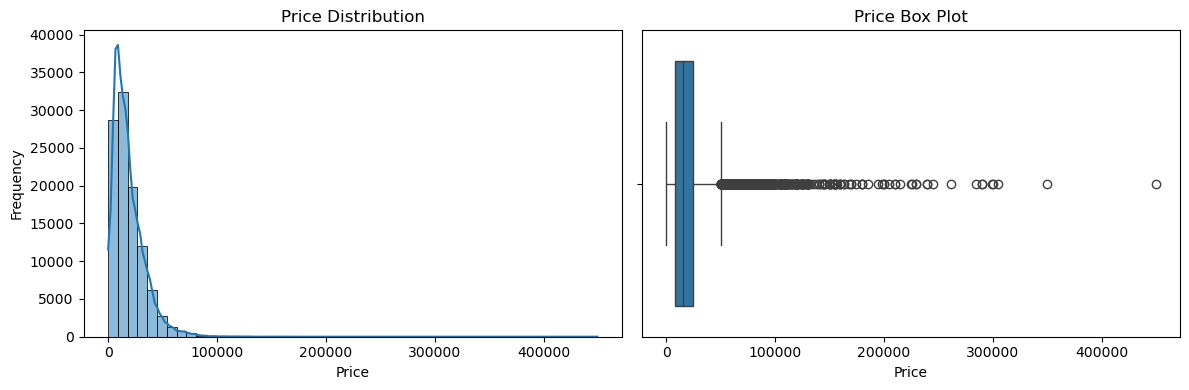

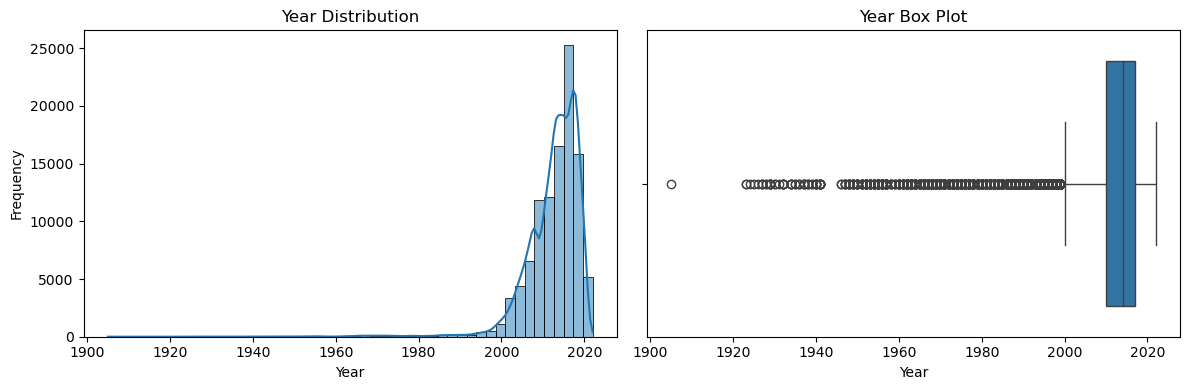

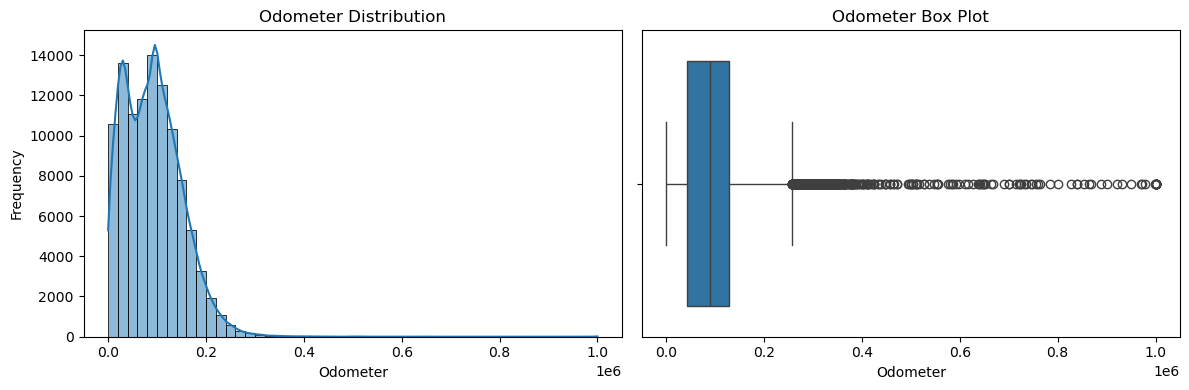

In [77]:
# Loop through each numerical columns and create histograms and density plots
for col in numerical_cols:
    plt.figure(figsize=(12, 4))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(clean_vehicles[col].dropna(), kde=True, bins=50)
    plt.title(f'{col.capitalize()} Distribution')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')
    
    # Density plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=clean_vehicles[col].dropna())
    plt.title(f'{col.capitalize()} Box Plot')
    plt.xlabel(col.capitalize())
    
    plt.tight_layout()
    plt.show()

Based on the above results, it looks like removing the following sets of data may be best option:
- Price value > 100,000
- Car older than 1980
- Odometer more than 250,000

In [78]:
# Let's find out how many records have price greater than 1 million
clean_vehicles[clean_vehicles.price.gt(100000)]['price'].count()

159

In [79]:
# Let's find out how many records are less than 1980
clean_vehicles[clean_vehicles.year.lt(1980)]['year'].count()

743

In [80]:
# Let's find out how many records are less than 1980
clean_vehicles[clean_vehicles.odometer.gt(250000)]['odometer'].count()

1047

In [81]:
# There are few records that are outliers. Let's remove them
clean_vehicles.drop(clean_vehicles[clean_vehicles.price.gt(100000)].index, inplace=True)
clean_vehicles.drop(clean_vehicles[clean_vehicles.year.lt(1980)].index, inplace=True)
clean_vehicles.drop(clean_vehicles[clean_vehicles.odometer.gt(250000)].index, inplace=True)
print ('Total number of records for analysis :',clean_vehicles.shape[0])

Total number of records for analysis : 102680


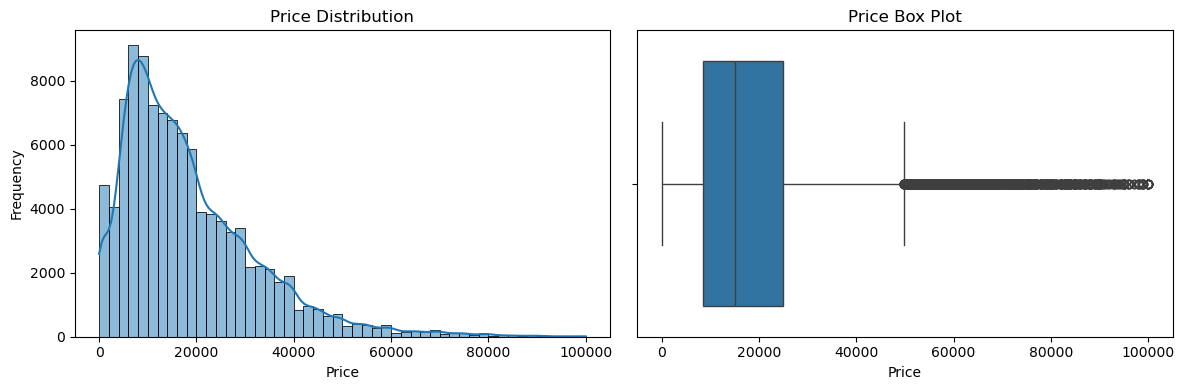

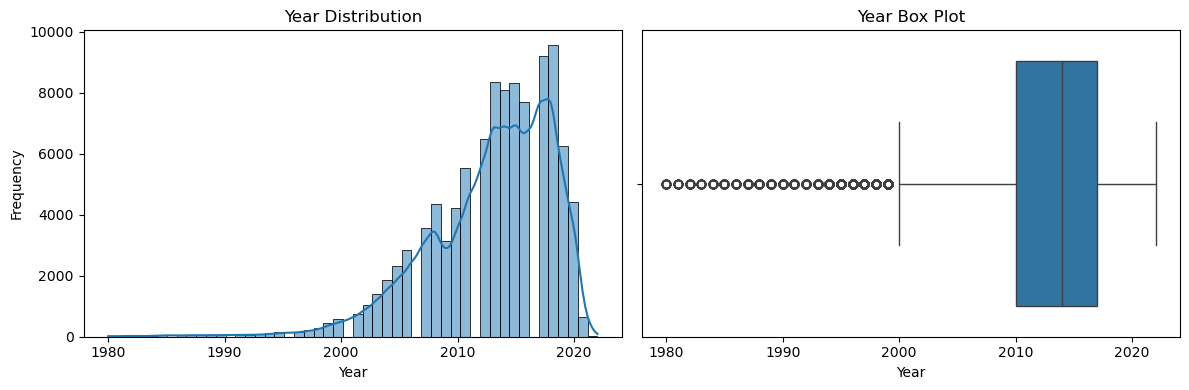

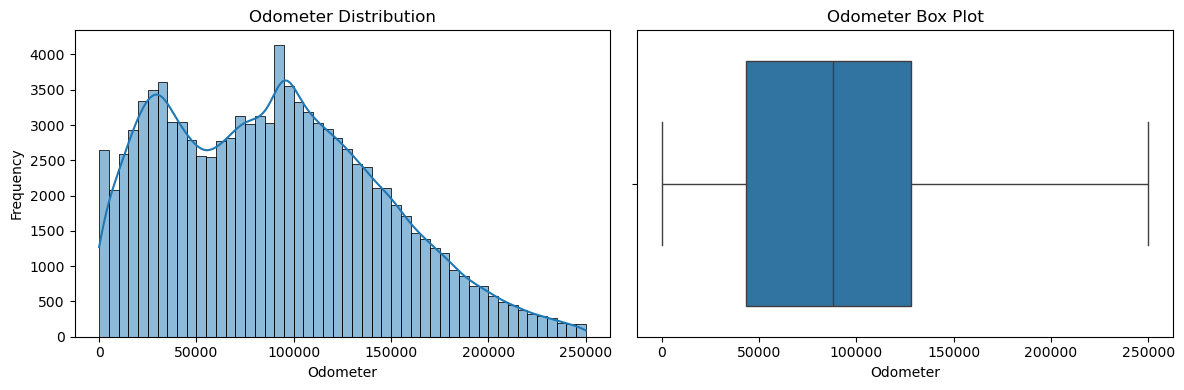

In [132]:
# Let's loop through each numerical columns again and create histograms and density plots
for col in numerical_cols:
    plt.figure(figsize=(12, 4))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(clean_vehicles[col].dropna(), kde=True, bins=50)
    plt.title(f'{col.capitalize()} Distribution')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')
    
    # Density plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=clean_vehicles[col].dropna())
    plt.title(f'{col.capitalize()} Box Plot')
    plt.xlabel(col.capitalize())
    
    plt.tight_layout()
    sfig = 'distr'+col+'.png'
    plt.savefig(sfig, bbox_inches='tight')
    plt.show()

In [83]:
# Let's review the counts of missing values
clean_vehicles.isnull().sum()

region              0
price               0
year                0
manufacturer     1872
model             465
condition       47524
cylinders       40199
fuel             1254
odometer            0
title_status     3049
transmission      880
drive           22830
size            76293
type            13551
paint_color     25256
state               0
dtype: int64

In [84]:
# Let's save this dataset as clean_vehicles_base. We can reuse this in the future for other evaluations.
clean_vehicles_base = clean_vehicles.copy(deep=True)

In [85]:
clean_vehicles_base.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102680 entries, 116 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   region        102680 non-null  object
 1   price         102680 non-null  int64 
 2   year          102680 non-null  Int64 
 3   manufacturer  100808 non-null  object
 4   model         102215 non-null  object
 5   condition     55156 non-null   object
 6   cylinders     62481 non-null   object
 7   fuel          101426 non-null  object
 8   odometer      102680 non-null  Int64 
 9   title_status  99631 non-null   object
 10  transmission  101800 non-null  object
 11  drive         79850 non-null   object
 12  size          26387 non-null   object
 13  type          89129 non-null   object
 14  paint_color   77424 non-null   object
 15  state         102680 non-null  object
dtypes: Int64(2), int64(1), object(13)
memory usage: 13.5+ MB


In [86]:
for col in clean_vehicles.columns:
    if clean_vehicles[col].isna().sum(axis = 0) > 0:
        clean_vehicles[col].fillna(clean_vehicles[col].mode()[0], inplace=True)

clean_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102680 entries, 116 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   region        102680 non-null  object
 1   price         102680 non-null  int64 
 2   year          102680 non-null  Int64 
 3   manufacturer  102680 non-null  object
 4   model         102680 non-null  object
 5   condition     102680 non-null  object
 6   cylinders     102680 non-null  object
 7   fuel          102680 non-null  object
 8   odometer      102680 non-null  Int64 
 9   title_status  102680 non-null  object
 10  transmission  102680 non-null  object
 11  drive         102680 non-null  object
 12  size          102680 non-null  object
 13  type          102680 non-null  object
 14  paint_color   102680 non-null  object
 15  state         102680 non-null  object
dtypes: Int64(2), int64(1), object(13)
memory usage: 13.5+ MB


In [87]:
# Price of cars based on each of the attributes
for c in ['condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color']:
    print ('Column being analyzed :', c, '\n')
    print (clean_vehicles.groupby(c, as_index=False,)['price'].mean().sort_values(by='price',ascending=False))
    print ()

Column being analyzed : condition 

   condition         price
4        new  28102.170543
3   like new  19995.421795
2       good  19166.686295
0  excellent  18321.531692
5    salvage   5421.442308
1       fair   4443.950321

Column being analyzed : cylinders 

      cylinders         price
1  12 cylinders  31082.543478
6   8 cylinders  23861.533721
7         other  21746.966555
3   4 cylinders  17732.108104
5   6 cylinders  17463.149944
0  10 cylinders  17294.732794
2   3 cylinders  13637.248649
4   5 cylinders   8631.547945

Column being analyzed : fuel 

       fuel         price
0    diesel  36913.826282
4     other  24177.509667
1  electric  23492.695021
2       gas  17122.040675
3    hybrid  14797.647477

Column being analyzed : title_status 

  title_status         price
1         lien  23002.690722
0        clean  18596.690077
4      rebuilt  13219.930831
5      salvage  12540.763060
3   parts only   4479.250000
2      missing   3273.172414

Column being analyzed : transmission

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [88]:
# Now let's find out the unique values in each of the columns. If there are less than 15 values, let's identify them
cols = []
for col in clean_vehicles.columns:
    if clean_vehicles[col].nunique() < 15: 
        cols.append(col)
        print (col, clean_vehicles[col].nunique(), clean_vehicles[col].unique(), '\n')

condition 6 ['good' 'excellent' 'fair' 'like new' 'new' 'salvage'] 

cylinders 8 ['4 cylinders' '6 cylinders' '8 cylinders' '5 cylinders' '10 cylinders'
 '12 cylinders' '3 cylinders' 'other'] 

fuel 5 ['gas' 'diesel' 'hybrid' 'other' 'electric'] 

title_status 6 ['clean' 'rebuilt' 'lien' 'salvage' 'missing' 'parts only'] 

transmission 3 ['other' 'automatic' 'manual'] 

drive 3 ['fwd' 'rwd' '4wd'] 

size 4 ['full-size' 'mid-size' 'compact' 'sub-compact'] 

type 12 ['hatchback' 'coupe' 'sedan' 'convertible' 'SUV' 'wagon' 'other' 'van'
 'pickup' 'truck' 'mini-van' 'offroad'] 

paint_color 12 ['white' 'red' 'silver' 'black' 'blue' 'grey' 'green' 'brown' 'yellow'
 'orange' 'custom' 'purple'] 



In [89]:
# Let's look at the columns to encode
print (cols)

['condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color']


### Encoding data
We have a few fields with ordinal data. Let's use ordinal encoding based on the data.

#### Ordinal Encoding 
**condition :** Ordinal will be : salvage, fair, good, excellent, like new, new

**cylinders :** Ordinal will be : 3 cylinders, 4 cylinders, 5 cylinders, 6 cylinders, 8 cylinders, 10 cylinders, 12 cylinders, other

**title_status :** Ordinal will be : salvage, parts only, missing, rebuilt, lien, clean

**drive :** Ordinal will be : rwd, fwd, 4wd

**size :** Ordinal will be : compact, sub-compact, mid-size, full-size

#### One Hot Encoding (OHE)

**type :** Values for OHE will be : 'hatchback', 'coupe', 'sedan', 'convertible', 'SUV', 'wagon', 'pickup', 'other'
 'van' 'truck' 'mini-van' 'offroad'

**paint_color :** Values for OHE will be : 'white', 'red', 'silver', 'black', 'blue', 'grey', 'green', 'brown', 'yellow',
 'orange', 'custom', 'purple'

**transmission :** Ordinal will be : manual, automatic, other

**fuel :** Ordinal will be : gas, diesel, hybrid, electric, other 

In [90]:
ord_condition = [['salvage', 'fair', 'good', 'excellent', 'like new', 'new']]
ord_cylinder = [['3 cylinders', '4 cylinders', '5 cylinders', '6 cylinders', '8 cylinders', '10 cylinders', '12 cylinders', 'other']]
ord_title_status = [['salvage', 'parts only', 'missing', 'clean', 'rebuilt', 'lien']]
ord_drive = [['rwd', 'fwd', '4wd']]
ord_size = [['compact', 'sub-compact', 'mid-size', 'full-size']]

In [91]:
# Let's reset the index as we have dropped a lot of records. This will also help us get started with encoding activities
clean_vehicles.reset_index(drop=True, inplace=True)
clean_vehicles

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,auburn,26990,2016,lexus,nx 200t sport utility 4d,good,4 cylinders,gas,31363,clean,other,fwd,full-size,hatchback,white,al
1,birmingham,4500,2008,ford,mustang,excellent,6 cylinders,gas,187016,clean,automatic,rwd,full-size,coupe,red,al
2,birmingham,4299,2007,nissan,sentra,excellent,4 cylinders,gas,189321,clean,automatic,fwd,full-size,sedan,silver,al
3,birmingham,16988,2008,toyota,fj cruiser,excellent,4 cylinders,gas,188099,clean,automatic,4wd,full-size,sedan,white,al
4,birmingham,16988,2018,nissan,altima,excellent,4 cylinders,gas,57517,clean,automatic,fwd,full-size,sedan,silver,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102675,wyoming,23590,2019,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226,clean,other,fwd,full-size,sedan,white,wy
102676,wyoming,30590,2020,volvo,s60 t5 momentum sedan 4d,good,4 cylinders,gas,12029,clean,other,fwd,full-size,sedan,red,wy
102677,wyoming,34990,2020,cadillac,xt4 sport suv 4d,good,4 cylinders,diesel,4174,clean,other,4wd,full-size,hatchback,white,wy
102678,wyoming,28990,2018,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112,clean,other,fwd,full-size,sedan,silver,wy


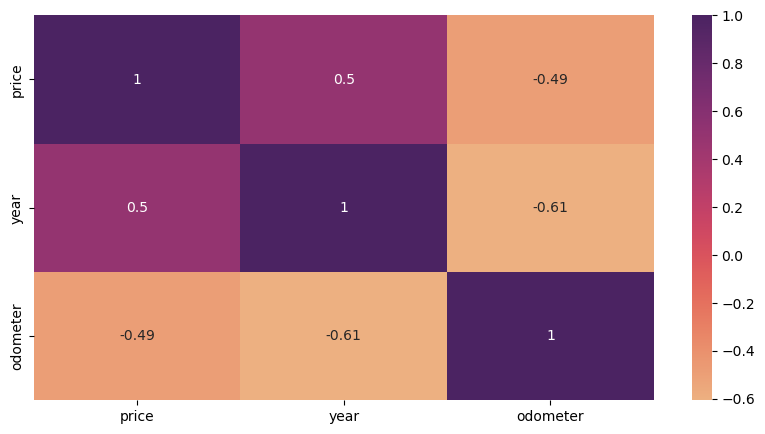

In [131]:
# Let's create a HeatMap to correlate numerical features

numerical_cols = clean_vehicles.select_dtypes(exclude=['object']).columns.tolist()
plt.figure(figsize=(10,5))
corr = clean_vehicles[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='flare')
plt.savefig('corr_heatmat.png', bbox_inches='tight')

In [93]:
ord_features = ['condition','cylinders','title_status','drive','size']
ordinal_transformer = OrdinalEncoder()

cat_features = ['transmission','type','paint_color','fuel']
categorical_transformer = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

ct = ColumnTransformer(
    transformers=[
        ("ord", ordinal_transformer, ord_features),
        ("cat", categorical_transformer, cat_features )
           ],
    remainder='passthrough'
)

# Add the following line to your code
ct.set_output(transform="pandas")

cleaned_vehicles = ct.fit_transform(clean_vehicles)
cleaned_vehicles

,ord__condition,ord__cylinders,ord__title_status,ord__drive,ord__size,cat__transmission_automatic,cat__transmission_manual,cat__transmission_other,cat__type_SUV,cat__type_convertible,...,cat__fuel_gas,cat__fuel_hybrid,cat__fuel_other,remainder__region,remainder__price,remainder__year,remainder__manufacturer,remainder__model,remainder__odometer,remainder__state
0,2.0,3.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,auburn,26990,2016,lexus,nx 200t sport utility 4d,31363,al
1,0.0,5.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,birmingham,4500,2008,ford,mustang,187016,al
2,0.0,3.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,birmingham,4299,2007,nissan,sentra,189321,al
3,0.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,birmingham,16988,2008,toyota,fj cruiser,188099,al
4,0.0,3.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,birmingham,16988,2018,nissan,altima,57517,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102675,2.0,5.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,wyoming,23590,2019,nissan,maxima s sedan 4d,32226,wy
102676,2.0,3.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,wyoming,30590,2020,volvo,s60 t5 momentum sedan 4d,12029,wy
102677,2.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,wyoming,34990,2020,cadillac,xt4 sport suv 4d,4174,wy
102678,2.0,5.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,wyoming,28990,2018,lexus,es 350 sedan 4d,30112,wy


In [94]:
numerical_cols = cleaned_vehicles.select_dtypes(exclude=['object']).columns.tolist()

cleaned_vehicles[numerical_cols]

,ord__condition,ord__cylinders,ord__title_status,ord__drive,ord__size,cat__transmission_automatic,cat__transmission_manual,cat__transmission_other,cat__type_SUV,cat__type_convertible,...,cat__paint_color_white,cat__paint_color_yellow,cat__fuel_diesel,cat__fuel_electric,cat__fuel_gas,cat__fuel_hybrid,cat__fuel_other,remainder__price,remainder__year,remainder__odometer
0,2.0,3.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,26990,2016,31363
1,0.0,5.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4500,2008,187016
2,0.0,3.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4299,2007,189321
3,0.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,16988,2008,188099
4,0.0,3.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,16988,2018,57517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102675,2.0,5.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,23590,2019,32226
102676,2.0,3.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,30590,2020,12029
102677,2.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,34990,2020,4174
102678,2.0,5.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,28990,2018,30112


In [95]:
numerical_cols

['ord__condition',
 'ord__cylinders',
 'ord__title_status',
 'ord__drive',
 'ord__size',
 'cat__transmission_automatic',
 'cat__transmission_manual',
 'cat__transmission_other',
 'cat__type_SUV',
 'cat__type_convertible',
 'cat__type_coupe',
 'cat__type_hatchback',
 'cat__type_mini-van',
 'cat__type_offroad',
 'cat__type_other',
 'cat__type_pickup',
 'cat__type_sedan',
 'cat__type_truck',
 'cat__type_van',
 'cat__type_wagon',
 'cat__paint_color_black',
 'cat__paint_color_blue',
 'cat__paint_color_brown',
 'cat__paint_color_custom',
 'cat__paint_color_green',
 'cat__paint_color_grey',
 'cat__paint_color_orange',
 'cat__paint_color_purple',
 'cat__paint_color_red',
 'cat__paint_color_silver',
 'cat__paint_color_white',
 'cat__paint_color_yellow',
 'cat__fuel_diesel',
 'cat__fuel_electric',
 'cat__fuel_gas',
 'cat__fuel_hybrid',
 'cat__fuel_other',
 'remainder__price',
 'remainder__year',
 'remainder__odometer']

In [96]:
X = cleaned_vehicles[numerical_cols].drop(columns=['remainder__price'])
y = cleaned_vehicles['remainder__price']

X.shape[0], X.shape[1]

(102680, 39)

In [97]:
X.columns

Index(['ord__condition', 'ord__cylinders', 'ord__title_status', 'ord__drive',
       'ord__size', 'cat__transmission_automatic', 'cat__transmission_manual',
       'cat__transmission_other', 'cat__type_SUV', 'cat__type_convertible',
       'cat__type_coupe', 'cat__type_hatchback', 'cat__type_mini-van',
       'cat__type_offroad', 'cat__type_other', 'cat__type_pickup',
       'cat__type_sedan', 'cat__type_truck', 'cat__type_van',
       'cat__type_wagon', 'cat__paint_color_black', 'cat__paint_color_blue',
       'cat__paint_color_brown', 'cat__paint_color_custom',
       'cat__paint_color_green', 'cat__paint_color_grey',
       'cat__paint_color_orange', 'cat__paint_color_purple',
       'cat__paint_color_red', 'cat__paint_color_silver',
       'cat__paint_color_white', 'cat__paint_color_yellow', 'cat__fuel_diesel',
       'cat__fuel_electric', 'cat__fuel_gas', 'cat__fuel_hybrid',
       'cat__fuel_other', 'remainder__year', 'remainder__odometer'],
      dtype='object')

In [98]:
# Split the data into train and test sets (80% train, 20% temp)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [99]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, LabelEncoder

from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

In [100]:
LReg = LinearRegression() # creating an instance of Linear Regression class
a_scaler = StandardScaler() # creating an instance of Standard Scaler

Ridge simple cross validation Train MSE: 92493878.08389969
Ridge simple cross validation Test MSE: 93180363.61416017
Best Ridge Alpha: {'ridge__alpha': 68.66488450043002}


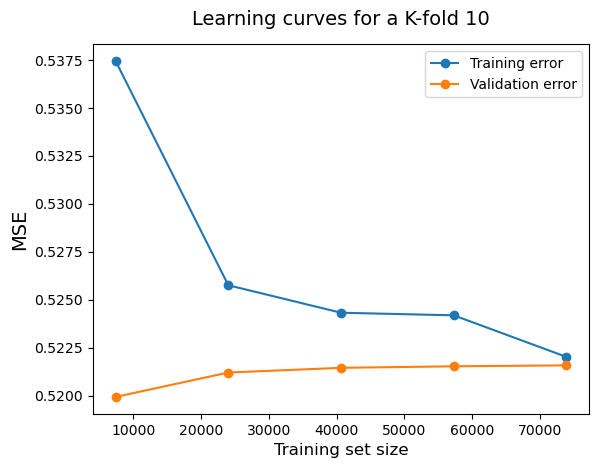

In [133]:
# ridge model with standardization
ridge_param_dict = {'ridge__alpha': np.logspace(0, 10, 50)}
ridge_pipe = Pipeline([('scaler', StandardScaler()), 
                      ('ridge', Ridge())])

ridge_grid = GridSearchCV(ridge_pipe, param_grid=ridge_param_dict, scoring='neg_mean_squared_error', cv=10)
ridge_grid.fit(X_train, y_train)

ridge_train_preds = ridge_grid.predict(X_train)
ridge_test_preds = ridge_grid.predict(X_test)

ridge_train_mse = mean_squared_error(y_train, ridge_train_preds)
ridge_test_mse = mean_squared_error(y_test, ridge_test_preds)

best_ridge_model = ridge_grid.best_estimator_.named_steps['ridge']
best_ridge_coefs = best_ridge_model.coef_
feature_names = ridge_grid.best_estimator_.named_steps['scaler'].get_feature_names_out()

ridge_df = pd.DataFrame({'feature': feature_names, 'coef': best_ridge_coefs})

train_sizes, train_scores, validation_scores = learning_curve(estimator=ridge_pipe, X=X_train, y=y_train, cv=10)
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

print(f"Ridge simple cross validation Train MSE: {ridge_train_mse}")
print(f"Ridge simple cross validation Test MSE: {ridge_test_mse}")
print(f"Best Ridge Alpha: {ridge_grid.best_params_}")

plt.plot(train_sizes, train_scores_mean, label = 'Training error', marker='o')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error', marker='o')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 12)
plt.title('Learning curves for a K-fold 10', fontsize = 14, y = 1.03)
plt.legend()
plt.savefig('k-fold-lcurve.jpeg', bbox_inches='tight')
plt.show()

Ridge k-fold cross validation Train MSE: 92498992.3769556
Ridge k-fold cross validation Test MSE: 93134068.70667933
Best Ridge Alpha: {'ridge__alpha': 1.0}


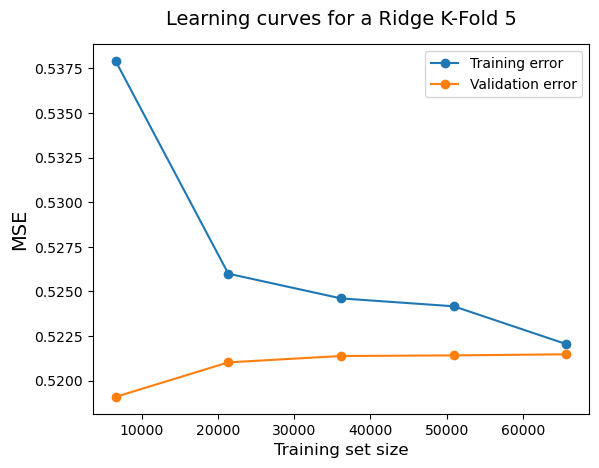

In [134]:
# k-fold cross validation
k_fold_model_finder = GridSearchCV(ridge_pipe, param_grid=ridge_param_dict, cv=5, scoring='neg_mean_squared_error' )
k_fold_model_finder.fit(X, y)
kf_ridge_train_preds = k_fold_model_finder.predict(X_train)
kf_ridge_test_preds = k_fold_model_finder.predict(X_test)
kf_ridge_train_mse = mean_squared_error(y_train, kf_ridge_train_preds)
kf_ridge_test_mse = mean_squared_error(y_test, kf_ridge_test_preds)

best_k_fold_model = k_fold_model_finder.best_estimator_.named_steps['ridge']
best_k_fold_coefs = best_k_fold_model.coef_
feature_names = k_fold_model_finder.best_estimator_.named_steps['scaler'].get_feature_names_out()
kf_df = pd.DataFrame({'feature': feature_names, 'coef': best_k_fold_coefs})


train_sizes, train_scores, validation_scores = learning_curve(estimator=ridge_pipe, X=X_train, y=y_train, cv = 5)
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

print(f"Ridge k-fold cross validation Train MSE: {kf_ridge_train_mse}")
print(f"Ridge k-fold cross validation Test MSE: {kf_ridge_test_mse}")
print(f"Best Ridge Alpha: {k_fold_model_finder.best_params_}")

plt.plot(train_sizes, train_scores_mean, label = 'Training error', marker='o')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error', marker='o' )
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 12)
plt.title('Learning curves for a Ridge K-Fold 5', fontsize = 14, y = 1.03)
plt.legend()
plt.savefig('k-fold-ridge.jpeg', bbox_inches='tight')
plt.show()

In [103]:
# Create the TransformedTargetRegressor with logarithm
regressor = TransformedTargetRegressor(regressor=None,
                                       func=np.log,
                                       inverse_func=np.exp)

# Define the parameter grid for grid search
param_grid = {
    'regressor': [Ridge()],
    'regressor__alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Create the grid search object to select the best alpha
grid_search = GridSearchCV(estimator=regressor,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error')

# Perform grid search
best_model = grid_search.fit(X_train, y_train)

Best Estimator: TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=Ridge(alpha=100))
Best Parameters: {'regressor': Ridge(), 'regressor__alpha': 100}


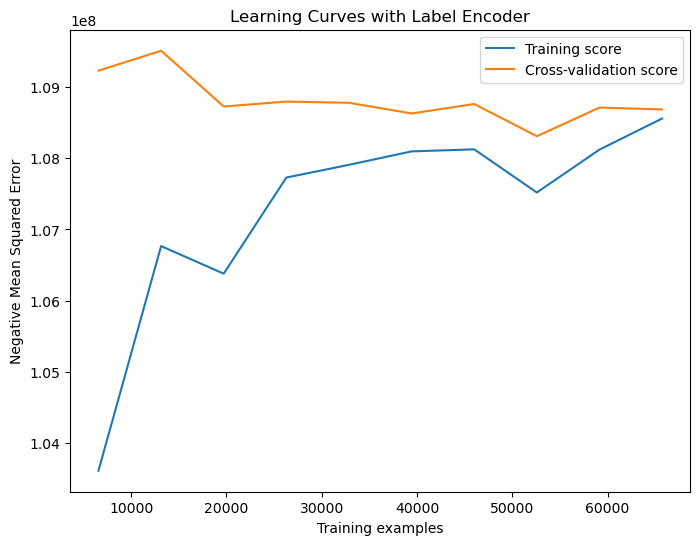

In [104]:
# Get the best estimator and best parameters
best_estimator = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Estimator:", best_estimator)
print("Best Parameters:", best_params)

# Plot the learning curves
train_sizes, train_scores, test_scores = learning_curve(
    best_estimator, X_train, y_train, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = -np.mean(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Negative Mean Squared Error')
plt.title('Learning Curves with Label Encoder')
plt.legend(loc='best')
plt.show()

In [105]:
ms = best_model.score(X_test, y_test)

print(f'The model score value is:  {ms:.3f}')

r = permutation_importance(best_model, X_test, y_test,
                           n_repeats=30,
                           random_state=0)

print ('The Permutation Importance for all the wage dataset are:\n')
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{X.columns[i]:<20}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")
        

The model score value is:  -110072110.262
The Permutation Importance for all the wage dataset are:

remainder__year     48085875.612 +/- 916142.548
remainder__odometer 33244440.367 +/- 662899.713
cat__fuel_diesel    12059939.628 +/- 251941.997
cat__type_pickup    9882418.760 +/- 414450.272
cat__type_sedan     6038728.832 +/- 390215.323
cat__type_truck     4909030.036 +/- 258168.142
ord__cylinders      2985739.807 +/- 231146.927
cat__type_hatchback 2860376.142 +/- 227691.510
cat__fuel_gas       2728432.247 +/- 155349.256
ord__drive          2052602.233 +/- 181385.830
ord__title_status   1063371.860 +/- 99859.356
cat__type_wagon     899228.642 +/- 122959.810
cat__type_SUV       766152.454 +/- 157775.801
cat__type_mini-van  331500.759 +/- 73574.842
cat__paint_color_black300529.166 +/- 107741.581
cat__type_convertible233274.952 +/- 108409.081
cat__paint_color_silver144333.551 +/- 26627.525
cat__fuel_hybrid    137912.917 +/- 46731.006
cat__paint_color_grey62346.088 +/- 18552.870
cat__paint_

In [106]:
pipe_1 = ''
pipe_1 = Pipeline([('linreg', LinearRegression())])
pipe_1.fit(X_train, y_train)

Pipeline(steps=[('linreg', LinearRegression())])

In [107]:
pred_train = pipe_1.predict(X_train)
pred_test = pipe_1.predict(X_test)
pipe_1_train_mse = mean_squared_error(y_train, pred_train)
pipe_1_test_mse = mean_squared_error(y_test, pred_test)

In [108]:
print(pipe_1.named_steps)
print(f'Train MSE: {pipe_1_train_mse: .2f}')
print(f'Test MSE: {pipe_1_test_mse: .2f}')

print(f"model score: {pipe_1.score(X_test, y_test): .3f}")

{'linreg': LinearRegression()}
Train MSE:  92493843.14
Test MSE:  93180408.73
model score:  0.516


In [109]:
# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),            # Step 1: Scale the features
    ('poly', PolynomialFeatures(degree=2, include_bias=False))  # Step 2: Create polynomial features
])

In [110]:
poly_features = ['remainder__year', 'remainder__odometer', ]
X_train_xd = pipeline.fit_transform(X_train[poly_features], y_train)
X_train_xd

array([[-1.07495125e+00,  1.42425761e+00,  1.15552019e+00,
        -1.53100750e+00,  2.02850974e+00],
       [ 1.13052857e+00, -1.48010067e+00,  1.27809485e+00,
        -1.67329609e+00,  2.19069799e+00],
       [ 3.95368629e-01, -1.01680727e+00,  1.56316353e-01,
        -4.02013698e-01,  1.03389703e+00],
       ...,
       [ 5.79158614e-01, -8.61818738e-01,  3.35424701e-01,
        -4.99129746e-01,  7.42731538e-01],
       [ 9.46738584e-01, -9.66659113e-01,  8.96313947e-01,
        -9.15173480e-01,  9.34429840e-01],
       [ 3.95368629e-01,  3.13601778e-02,  1.56316353e-01,
         1.23988305e-02,  9.83460754e-04]])

In [111]:
X_test_xd = pipeline.transform(X_test[poly_features])
X_test_xd

array([[-1.07495125,  0.58520745,  1.15552019, -0.62906948,  0.34246775],
       [ 0.57915861, -0.22317945,  0.3354247 , -0.1292563 ,  0.04980907],
       [-0.5235813 ,  0.41911325,  0.27413737, -0.21943986,  0.17565591],
       ...,
       [ 0.39536863, -0.75185267,  0.15631635, -0.29725896,  0.56528244],
       [ 0.94673858, -1.4870258 ,  0.89631395, -1.4078247 ,  2.21124574],
       [ 0.21157864, -0.73093186,  0.04476552, -0.15464957,  0.53426138]])

In [112]:
# Get feature names from polynomial transformation
poly_feature_names = pipeline.named_steps['poly'].get_feature_names_out(input_features=poly_features)
poly_feature_names

array(['remainder__year', 'remainder__odometer', 'remainder__year^2',
       'remainder__year remainder__odometer', 'remainder__odometer^2'],
      dtype=object)

In [113]:
# Convert transformed data to DataFrame with correct column names
X_train_tformed = pd.DataFrame(X_train_xd, columns=poly_feature_names)
X_test_tformed = pd.DataFrame(X_test_xd, columns=poly_feature_names)
X_train_tformed

,remainder__year,remainder__odometer,remainder__year^2,remainder__year remainder__odometer,remainder__odometer^2
0,-1.074951,1.424258,1.155520,-1.531008,2.028510
1,1.130529,-1.480101,1.278095,-1.673296,2.190698
2,0.395369,-1.016807,0.156316,-0.402014,1.033897
3,-1.993901,0.755373,3.975642,-1.506139,0.570589
4,0.395369,-0.262585,0.156316,-0.103818,0.068951
...,...,...,...,...,...
82139,0.946739,-1.044508,0.896314,-0.988876,1.090997
82140,1.314319,-1.144641,1.727433,-1.504422,1.310202
82141,0.579159,-0.861819,0.335425,-0.499130,0.742732
82142,0.946739,-0.966659,0.896314,-0.915173,0.934430


In [114]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, r2_score

In [115]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net Regression': ElasticNet(),
}

In [116]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_tformed, y_train)
    y_pred = model.predict(X_test_tformed)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R2': r2}
    print(f"{name}: RMSE = {rmse:.4f}, R2 = {r2:.4f}")

Linear Regression: RMSE = 11240.0207, R2 = 0.3443
Ridge Regression: RMSE = 11240.0197, R2 = 0.3443
Lasso Regression: RMSE = 11240.0253, R2 = 0.3443
Elastic Net Regression: RMSE = 11503.4303, R2 = 0.3133


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [117]:
def vif(exogs, data):
  vif_dict = {}

  for exog in exogs:
    not_exog = [i for i in exogs if i != exog] #First column is excluded from this list which becomes y in next step
    X, y = data[not_exog], data[exog]

    r_squared = LinearRegression().fit(X,y).score(X,y) 
    #.score(X, y) computes the 𝑅 square value for the fitted model, which measures the proportion of variance in y explained by X.

    # calc the VIF
    vif = 1/(1-r_squared)
    vif_dict[exog] = vif

  return pd.DataFrame({"VIF":vif_dict})

In [118]:
vif_data = vif(X_train.columns, X_train).sort_values(by = 'VIF', ascending = False)
vif_data

,VIF
cat__type_wagon,inf
cat__type_truck,inf
cat__paint_color_yellow,inf
cat__paint_color_white,inf
cat__paint_color_silver,inf
cat__paint_color_red,inf
cat__paint_color_purple,inf
cat__paint_color_orange,inf
cat__paint_color_grey,inf
cat__paint_color_green,inf


#### Interpretation of VIF Results

The VIF results provided us with a good insight into their multicollinearity. A value of inf (infinity), indicates the column is perfect multicollinearity.

#### Features with Infinite VIF

All categorical variables show strong collinearity. The ordinal values do not show that leve of strong collinearity. The ones that show strong collinearity are:
- Paint Colors
- Car Type
- Fuel Types
- Transmission Types: All transmission types also show collinearity.

In [119]:
X_test_tformed = X_test[['remainder__year','remainder__odometer','ord__cylinders','ord__condition','ord__drive',
                           'ord__size','ord__title_status']]

In [120]:
# Let's take Linear Regression and do some more analysis
from sklearn.model_selection import cross_val_score, KFold

model = LinearRegression()

# Use KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and collect coefficients
coefficients = []
scores = []

for train_index, test_index in kf.split(X_train_tformed):
    X_train_fold, X_test_fold = X_train_tformed.iloc[train_index], X_train_tformed.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    model.fit(X_train_fold, y_train_fold)
    coefficients.append(model.coef_)
    scores.append(model.score(X_test_fold, y_test_fold))

# Convert list of coefficients to a DataFrame
coefficients_df = pd.DataFrame(coefficients, columns=X_train_tformed.columns)

# Evaluate coefficients (e.g., mean and standard deviation across folds)
coefficients_mean = coefficients_df.mean()
coefficients_std = coefficients_df.std()

print("Coefficients mean:")
print(coefficients_mean)
print("\nCoefficients standard deviation:")
print(coefficients_std)

# Evaluate scores
mean_score = np.mean(scores)
std_score = np.std(scores)

print("\nMean cross-validation score:", mean_score)
print("Standard deviation of cross-validation score:", std_score)

Coefficients mean:
remainder__year                        7116.053475
remainder__odometer                   -3117.281266
remainder__year^2                      1432.194820
remainder__year remainder__odometer     -88.153230
remainder__odometer^2                   999.063237
dtype: float64

Coefficients standard deviation:
remainder__year                        57.076303
remainder__odometer                    50.189633
remainder__year^2                      28.507938
remainder__year remainder__odometer    33.681834
remainder__odometer^2                  24.258451
dtype: float64

Mean cross-validation score: 0.350641051054999
Standard deviation of cross-validation score: 0.004874438517666223


In [121]:
# Create a DataFrame to show actual vs. predicted values
actual_vs_predicted_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
actual_vs_predicted_df.head()

,Actual,Predicted
55314,12990,12117.742010
8751,13730,20396.142915
78230,15495,14091.669625
85203,32995,20886.206493
2623,1,24304.693894


In [122]:
# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the entire training dataset
model.fit(X_train, y_train)

# Predict on the test dataset
y_pred = model.predict(X_test)

In [123]:
model.coef_

array([-9.02397921e+01,  1.37424875e+03, -1.39804376e+03, -1.80984234e+03,
       -6.86879699e+01, -8.05211973e+02,  7.40310037e+02,  6.49019342e+01,
       -2.36075511e+03,  2.81262751e+03,  1.32836265e+03, -7.22185220e+03,
       -3.43649361e+03,  7.44375716e+03, -4.72821990e+02,  6.40093942e+03,
       -3.79193524e+03,  4.53268612e+03, -8.65492311e+02, -4.36902241e+03,
        1.02286043e+03, -5.81451239e+02, -2.94201839e+02, -7.99502575e+02,
        4.03311258e+02, -7.04229589e+02, -1.63998422e+02,  7.64807383e+02,
       -3.50579946e+02, -6.95980447e+02, -3.64758986e+02,  1.76372397e+03,
        1.11720464e+04, -9.73329698e+02, -4.16909328e+03, -3.54764939e+03,
       -2.48197402e+03,  8.02230980e+02, -8.62851913e-02])

In [124]:
model.intercept_

-1586920.7725415563

In [125]:
model.feature_names_in_

array(['ord__condition', 'ord__cylinders', 'ord__title_status',
       'ord__drive', 'ord__size', 'cat__transmission_automatic',
       'cat__transmission_manual', 'cat__transmission_other',
       'cat__type_SUV', 'cat__type_convertible', 'cat__type_coupe',
       'cat__type_hatchback', 'cat__type_mini-van', 'cat__type_offroad',
       'cat__type_other', 'cat__type_pickup', 'cat__type_sedan',
       'cat__type_truck', 'cat__type_van', 'cat__type_wagon',
       'cat__paint_color_black', 'cat__paint_color_blue',
       'cat__paint_color_brown', 'cat__paint_color_custom',
       'cat__paint_color_green', 'cat__paint_color_grey',
       'cat__paint_color_orange', 'cat__paint_color_purple',
       'cat__paint_color_red', 'cat__paint_color_silver',
       'cat__paint_color_white', 'cat__paint_color_yellow',
       'cat__fuel_diesel', 'cat__fuel_electric', 'cat__fuel_gas',
       'cat__fuel_hybrid', 'cat__fuel_other', 'remainder__year',
       'remainder__odometer'], dtype=object)

In [126]:
model_coef = pd.DataFrame({
    'Feature': model.feature_names_in_,
    'Coef': model.coef_
})
model_coef.sort_values(by='Coef', ascending=False)

,Feature,Coef
32,cat__fuel_diesel,11172.046383
13,cat__type_offroad,7443.757163
15,cat__type_pickup,6400.939422
17,cat__type_truck,4532.686123
9,cat__type_convertible,2812.627514
31,cat__paint_color_yellow,1763.723971
1,ord__cylinders,1374.248752
10,cat__type_coupe,1328.362654
20,cat__paint_color_black,1022.860431
37,remainder__year,802.230980


       Actual     Predicted
55314   12990  19624.718325
8751    13730  19776.824821
78230   15495  23677.701852
85203   32995  22317.120273
2623        1  29843.613247


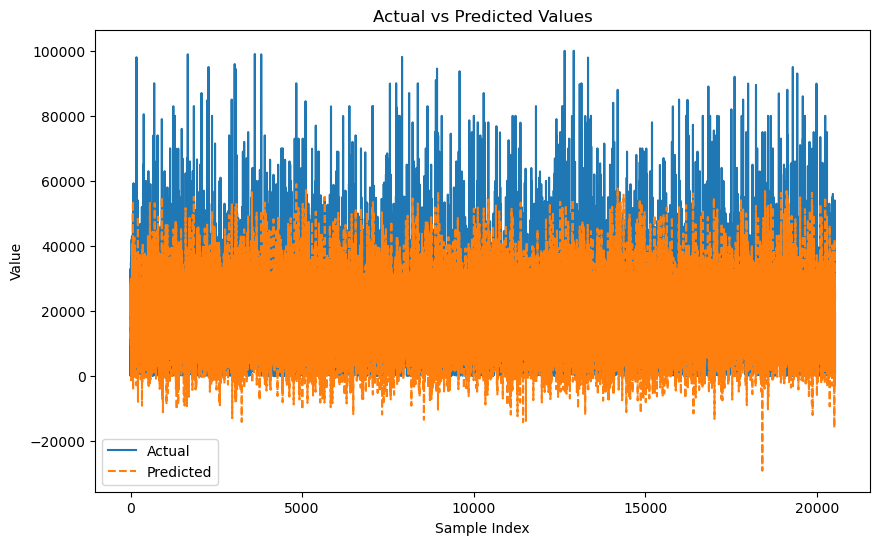

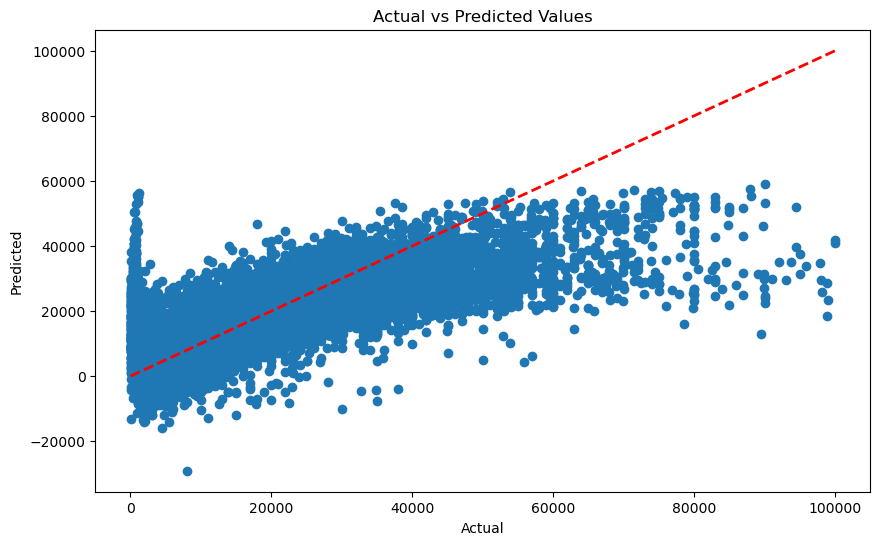

In [136]:
import matplotlib.pyplot as plt

# Create a DataFrame to compare actual vs predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Print the comparison
print(comparison_df.head())

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(comparison_df['Actual'].values, label='Actual')
plt.plot(comparison_df['Predicted'].values, label='Predicted', linestyle='--')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.savefig('ActualvsPredicted1.jpeg', bbox_inches='tight')
plt.show()

# Scatter plot for better visual comparison
plt.figure(figsize=(10, 6))
plt.scatter(comparison_df['Actual'], comparison_df['Predicted'])
plt.plot([comparison_df['Actual'].min(), comparison_df['Actual'].max()], [comparison_df['Actual'].min(), comparison_df['Actual'].max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.savefig('ActualvsPredicted2.jpeg', bbox_inches='tight')
plt.show()

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

#### Observations:

##### Data Issues:

- The original observed dataset had 426,880 records. Many of the attributes had incomplete data resulting in poor data quality
- Excluding many of the data and normalizing the remaining, we ended up with only 102,680 records.
- We had a lost off 324,200 records due to poor quality data. Due to limited time, further research was not possible on the missing dataset
- To perform high quality prediction and to develop a model, a good population of the data is required

##### Encoding Issues:
- Ordinal and One Hot Encoding had limited effect of the data due to large portion of missing data.
- Some of the ordinal values had good data while others did not. Some of the One Hot Encoded values had poor data
- Results reflected strong contributors to predictions when values existed and there were variance in the data to build correlation

In [128]:
# For Reference, below is a table of the count of null and unique values for Original data

print (f'Vehicles dataset - Original data. Total # of records in Original dataset {vehicles.shape[0]:,} \n')

x1,x2,x3,x4 ='Attribute','Nulls','% of Nulls','Count of Unique Values'
print (f'{x1:<15} {x2:<10} {x3:<10} {x4}')

for c in vehicles.columns:
    print (f'{c:<15} {vehicles[c].isna().sum():<10,} {(vehicles[c].isna().sum()/vehicles.shape[0])*100:<10.2f} {vehicles[c].nunique():,}')

Vehicles dataset - Original data. Total # of records in Original dataset 426,880 

Attribute       Nulls      % of Nulls Count of Unique Values
id              0          0.00       426,880
region          0          0.00       404
price           0          0.00       15,655
year            1,205      0.28       114
manufacturer    17,646     4.13       42
model           5,277      1.24       29,649
condition       174,104    40.79      6
cylinders       177,678    41.62      8
fuel            3,013      0.71       5
odometer        4,400      1.03       104,870
title_status    8,242      1.93       6
transmission    2,556      0.60       3
VIN             161,042    37.73      118,246
drive           130,567    30.59      3
size            306,361    71.77      4
type            92,858     21.75      13
paint_color     130,203    30.50      12
state           0          0.00       51


In [129]:
# For Reference, below is a table of the count of null and unique values for Cleansed data

print (f'Vehicles dataset - Cleansed data. Total # of records in Cleansed dataset {clean_vehicles.shape[0]:,} \n')

x1,x2,x3,x4 ='Attribute','Nulls','% of Nulls','Count of Unique Values'
print (f'{x1:<15} {x2:<10} {x3:<10} {x4}')

for c in clean_vehicles.columns:
    print (f'{c:<15} {clean_vehicles[c].isna().sum():<10,} {(clean_vehicles[c].isna().sum()/clean_vehicles.shape[0])*100:<10.2f} {clean_vehicles[c].nunique():,}')

Vehicles dataset - Cleansed data. Total # of records in Cleansed dataset 102,680 

Attribute       Nulls      % of Nulls Count of Unique Values
region          0          0.00       399
price           0          0.00       11,713
year            0          0.00       43
manufacturer    0          0.00       41
model           0          0.00       15,425
condition       0          0.00       6
cylinders       0          0.00       8
fuel            0          0.00       5
odometer        0          0.00       72,063
title_status    0          0.00       6
transmission    0          0.00       3
drive           0          0.00       3
size            0          0.00       4
type            0          0.00       12
paint_color     0          0.00       12
state           0          0.00       51


#### Conclusion

This project used the structured CRISP-DM framework to address the business problem. All missing data was either removed or resolved by leveraging data from other attributes / records. With the limited data, the following observations were made.

|Attribute|Impact|Observation| Recommendation|
|:-----------|:----------:|:-------------------------------------------------------|:-------------------------------------------------------|
|Id|None|Not critical and was ignored for the analysis|Good to use as index reference|
|Region|Low|Not a major contributor for the analysis at macro level|Can be used to breakup data by region and analyze for targeted results|
|Year|High|Important attribute as it is directly correlated to the price of the car. The older the car, the cheaper it gets. However, if the car is very old and in good condition, the price increases or remains stable|Rank the car price by year and compare over the past years to see how the price of car performs over the years. This will give a good indication on which cars to focus and secure for resale|
|Manufacturer|Unknown | There are 41 unique manufacturers. Some of them have less than 10 cars and does not provide enough insight to make a recommendation. Also some of the manufacturers listed are actually models of vehicles (ex: ram, gmc) resulting in bad data. The top 10 manufacturers contribute to 68% of the data |Analyzing the top 10 manufacturers may provide good insight into resale. This may be more productive and time saving than analyzing all the data (use 80-20 rule)|
|Model|Unknown |There are 15,425 unique models in the cleansed dataset (29,649 unique models in original dataset). Top 10 models contribute to only 11% of the data. Top 1,000 models contribute to 50% of the data. Since this data is free text, it was not considered for the analysis.|Focus on converting the model data to numeric value in comparison with manufacturer, transmission, cylinder, and other dependent attributes (use general knowledge to perform the comparison). Numeric value can be used in the model to determine the correlation and influence on the car price. Also identify similarities between models and create subgroups based on data from other attributes like manufacturer, cylinder, fuel, transmission, size, and type. Convert this to numeric value for further analysis|
|Condition|High |More than 50% of the data are nulls and unusable unless further analysis can be done to replace the missing data. The value of price is directly correlated to the quality or condition of the car.|Find ways to improve the quality of the data either through better data acquisition techniques or using exploratory data analysis (EDA) to fill missing values. Comparing the missing data against others that have values can provide better insight to update the missing data. Also, analyze price impact based on specific values of condition.|
|Cylinders|Medium |Approximately 42% of the data are nulls and unusable unless further analysis can be done to replace the missing data. Price range depends on the cylinders. However, some prices were poorly represented and impacted the price range to analyze data using cylinders. The 12 and 8 cylinder vehicles have higher price while 3 and 5 cylinders result in less price. Also, the data shows that there are 27 manufacturers that make 5 cylinder cars. However, there are less than 10 manufacturers that make 5 cylinder cars. So cleaning up the data is critical to get accurate results |Invest time to clean up the data and find ways to separate data by cylinder and analyze for better accuracy of the resale car price. Incorrect data like 5 cylinders have to be addressed or excluded before further analysis can be done. It can badly influence the results and recommendations|
|Fuel        |High |Based on the analysis, diesel cars seem to generate the highest price. However, in reality we know that the production and sales of diesel cars are declining due to environmental issues. There are only 7% of the data that represent diesel cars.|Detailed analysis has to be performed to see why diesel cars have such high correlation. Alternatively, excluding diesel cars (knowing that many states are banning sale of diesel car) may be beneficial as the recommendation may not be useful information for car resale|
|Odometer    |High |New, like new, and good cars have higher resale price. Cars with excellent rating are not resulting in higher resale. The contributing factor to the condition is the odometer reading. A car with lower miles and better condition results in higher resale price. Higher miles on the car reduces the bargaining powerfor the car dealer|Focus on acquiring used cars that have low mileage. Customers prefer to buy newer cars compared to cars in excellent condition.|
|Title_status|Low|While the title status is not critical for car resale, a missing title impacts the resale price. Customers tend to prefer lien and clean car title|Focus on acquiring cars that have clean title. Reducing spending time on cars that are salvaged, parts only, or missing title. It may cost more for the dealer to sell these cars compared to a lien and clean title cars.|
|Transmission|Unknown|There are only 3 types of transmissions in the dataset. The automatic transmission has higher number of records while other category resulted in higher sale price. Based on data, it would be best to focus on automatic transmission. The manual cars were fewer and provided the least resale price |Focus on acquiring automatic transmission cars and use other attributes to determine resale price|
|VIN|Low|The VIN number does not have any impact to the resale of a car unless the VIN number is very low and someone is really looking for a specific VIN number. Ignoring this data can save time in the analysis. However, before you ignore the data, you can use this data to compare if there is any missing data and replace them.|Use VIN information to find missing data and use the record with the most information.|
|Drive|Low|30% of the original dataset was missing data. There are 3 types of data in the dataset - 4 wheel drive (4WD), forward wheel drive (FWD), and rear wheel drive (RWD). Data indicates we have higher number of 4WD vehicles for sale. There are very few FWD vehicles. More customers choose 4WD compared to other cars.|Focus on acquiring 4WD cars and highlight its benefits to potential buyers. While FWD and RWD are fewer in numbers, futher analysis needs to be performed by region to determine if FWD or RWD has a higher chance of resale in a specific location.|
|Size|Unknown|72% of the original dataset was missing data. There are only 4 sizes namely, full, mid, sub-compact, and compact. However, there are higher number of full size cars indicating higher sale volume and availability for resale.|Size plays a big role in the resale price. Bigger vehicles with the right cylinders, condition, and mileage can result in higher resale price. With limited data available, the correlation was not enough. Focus on acquiring cleaner data that helps improve the quality of this attribute.|
|Type|High|Trucks, Pickups, and SUVs have higher counts in the dataset. Only 22% of dataset is missing values.|Focus on acuqiring SUVs, Pickups, Trucks, and Vans. These tend to sell faster than regular sedansm coupe, and convertables. Understanding the customer base and region specific would be more critical. Further analysis by state and region can help drive better decision for acquisition and resale of cars.|
|Paint_color |Low|31% of the data was missing color information. Yellow and black seem to be the available data. A particular car color did not have a major impact on the price of the car|Understand the customer segment and perform more indepth analysis by car paint color to determine if this is relevant. Then secure cars for resale for colors that customers prefer.|
|State       |Low     |There are 51 unique states represtend in this dataset. Top 10 states contribute to 50% of the data. There were no missing data in the state attribute |Analyzing the dataset for top 10 states would provide good insight and save time analyzing the full dataset. Additionally, analyzing data by state and then by region would provide more customized resale value than comparing it across all 50 states. Demand for certain types of cars may be state/region specific and would provide critical and valuable information for car resellers|
|Price       |Target  |Inconsistency in the data and high subset of anomolies prevented from using all the data. Reviewing data by sampling, it was observed some of them were incorrect. Price of car was set to 1, 2, 3... 10 and may not truly reflect the actual price    |It would be best to invest time to secure cleaner data. Further research could help remove bad data or correct them based on other attributes|


#### Approach and Future work

Having completed the analysis and summarized the finding, here are some of my recommendation in case someone is planning to redo this exercise.

- Perform 4 different sets of analysis
  1. Remove all missing values and process only records that have all the values in each row
  2. Separate the data by state and region; analyze them separately. The resale price of a car in one state will be different from others as the customer preferences vary
  3. Before removing all the missing values, use other attributes to determine if missing data can be recreated. For example, an electric car does not have cylinders. It should remain null and should be acceptable. Replace null with 'not applicable'. That way we are not removing null rows. Similarly, find anomolies and exclude them. For example, there are fewer manufacturers that make and sell 5 cylinder cars. Also, based on regulatory needs, some dataset can be eliminated such as cars with fuel type diesel. Focus on gas, electric, and hybrid for analysis
  4. Remove columns that are not required for analysis and consolidate columns if possible. For example, State and Region can be analyzed and only one of them may be required for analysis
 
- Based on data visualization, further reduction of data can be made such as excluding anomolies. Also in some cases, applying Ordinal or Label encoding may be better than One Hot Encoding. Use different approaches to determine how the data is correlated

- Perform VIF and Permutation Importance before we start modeling. It will help us reduce the number of attributes and also help identify multicollinearity.
  
- Once we have a clean dataset, apply modeling and prediction.

#### Insights and Next Steps

- **Acquisition of Cars for resale:** Focus on acquiring newer cars or like newer cars. If the cars are used for a longer period of time, focus on lien or clean title cars. Additionally, focus on aquiring trucks, pickups, suvs and minivans. Do not acquire convertables and offroads as data indicates the sale is fewer in number. Do not acquire diesel cars as the regulations indicate customers will switch to electric, hybrid, and gasoline cars.
  
- **Improve Car Sales data:** Focus on acquiring cleaner dataset or invest money in cleaning up existing data. Research has to be done to understand the relationship between each attribute and use that to clean the data. Poor dataset will not yeild in good recommendation. Some of the price for cars were 1 through 20. This does not look like clean data and must be improved. On the other extreme, some of the cars showed sale price of 5 million or more. Acquire car sales data for electric, hybrid, and gasoline cars and for trucks, pickups, suvs, and minivans.
  
- **Pricing Strategy:** Analyze the data and create pricing strategy by State and Region. The sale price of a used car varies by state and region. Knowing the customer and the economic condition is critical to determine which car would be best for the customer. Additionally, acquire DMV data for cars and economic data. Use both this data to improve the pricing stategy for used car resale price.

- **Continuous Model Refinement:** As we cleanse and acquire new data, it is important to revisit the model and refine them. Capture actual results of car resale price and compare them with existing data. If the data does not match the predicted values, models need to be refined further. Once we are able to predict the resale price of a car, it may reset the baseline of the existing data and trigger a need to rework the models for new baseline. It is important to understand that and continuously refine the models. 